# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [29]:
# Cell type : CodeRead

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [19]:
# Cell type : CodeWrite

def covariance(X):
    """ Compute covariance matrix of X.

    Arguments:
    X: numpy array of shape (n,d)

    Returns:
    cov : numpy array of shape (d,d)
    
    """
    n, d = X.shape
    cov = np.zeros((d, d))
    for i in range(d):
        for j in range(d):
            cov[i, j] = np.sum((X[:, i] - np.mean(X[:, i])) * (X[:, j] - np.mean(X[:, j]))) / n
    return cov

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    a = np.sum(Y_train == 1) / len(Y_train)
    X_pos = X_train[Y_train == 1]
    X_neg = X_train[Y_train == -1]
    mu_pos = np.mean(X_pos, axis=0)
    mu_neg = np.mean(X_neg, axis=0)
    w = mu_pos - mu_neg
    b = -0.5 * np.dot(mu_pos, mu_pos) + 0.5 * np.dot(mu_neg, mu_neg) + np.log(a / (1 - a))
    Y_test_pred = np.sign(np.dot(X_test, w) + b)
    return Y_test_pred
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    a = np.sum(Y_train == 1) / len(Y_train)
    X_pos = X_train[Y_train == 1]
    X_neg = X_train[Y_train == -1]
    mu_pos = np.mean(X_pos, axis=0)
    mu_neg = np.mean(X_neg, axis=0)
    sigma = covariance(X_pos)*a + covariance(X_neg)*(1-a)
    sigma_inv = np.linalg.inv(sigma)
    w = np.dot(sigma_inv, mu_pos) - np.dot(sigma_inv, mu_neg)
    b = -0.5 * np.dot(np.dot(mu_pos, sigma_inv), mu_pos) + 0.5 * np.dot(np.dot(mu_neg, sigma_inv), mu_neg) + np.log(a / (1 - a))
    Y_test_pred = np.sign(np.dot(X_test, w) + b)
    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    a = np.sum(Y_train == 1) / len(Y_train)
    X_pos = X_train[Y_train == 1]
    X_neg = X_train[Y_train == -1]
    mu_pos = np.mean(X_pos, axis=0)
    mu_neg = np.mean(X_neg, axis=0)
    sigma_pos = covariance(X_pos)
    sigma_neg = covariance(X_neg)
    sigma_pos_inv = np.linalg.inv(sigma_pos)
    sigma_neg_inv = np.linalg.inv(sigma_neg)
    pow_pos = np.sum(np.dot(X_test - mu_pos, sigma_pos_inv) * (X_test - mu_pos), axis=1)
    pow_neg = np.sum(np.dot(X_test - mu_neg, sigma_neg_inv) * (X_test - mu_neg), axis=1)
    ans = -0.5 * pow_pos + 0.5 * pow_neg + np.log(a / (1 - a)) - 0.5 * np.log(np.linalg.det(sigma_pos) / np.linalg.det(sigma_neg))
    Y_test_pred = np.sign(ans)
    return Y_test_pred

    
    




In [20]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


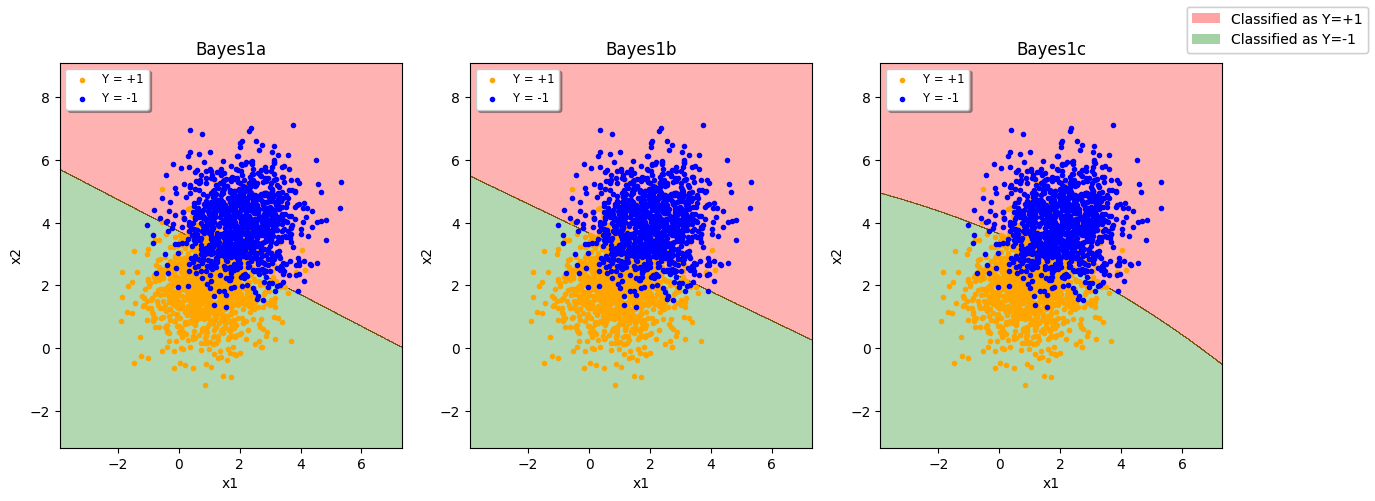

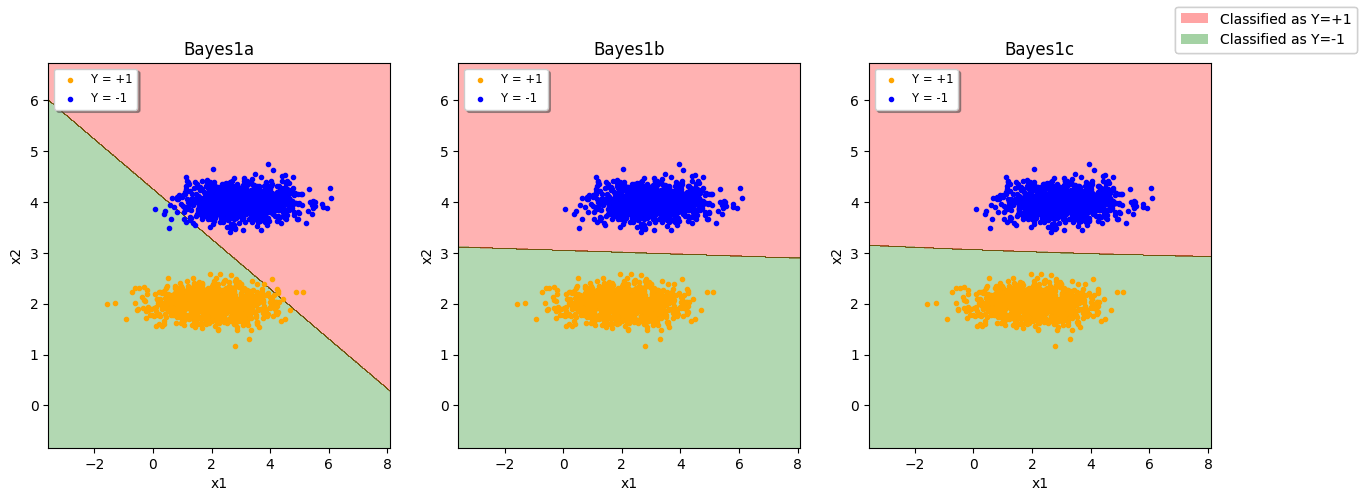

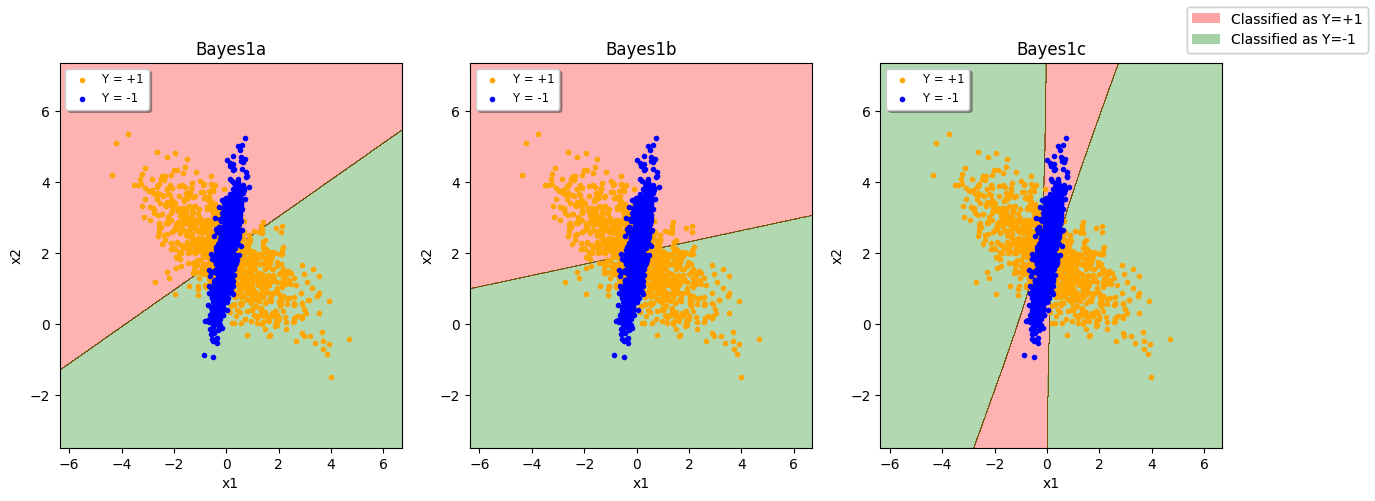

In [35]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

error_rate = []

def Plot(file):
    # Loading the data from dataset1_1.npz
    data = np.load('./dataset/'+file)
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']

    # Plotting

    # Create a mesh to plot in
    x_min, x_max = X_train[:, 0].min() - 2, X_train[:, 0].max() + 2
    y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

    # One plot with 3 subplots, one for each algo
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    Y_pred = [None] * 3
    Y_pred[0] = Bayes1a(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    Y_pred[1] = Bayes1b(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    Y_pred[2] = Bayes1c(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    for i in range(3):
        ax[i].set_xlabel('x1')
        ax[i].set_ylabel('x2')
        cf = ax[i].contourf(xx, yy, Y_pred[i], colors=['r', 'g'], alpha=0.3)
        proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in cf.collections]
        artist = fig.legend(proxy, ['Classified as Y=+1', 'Classified as Y=-1'])
        ax[i].scatter(X_train[Y_train==1].T[0], X_train[Y_train==1].T[1], c='orange', label='Y = +1', marker='.')
        ax[i].scatter(X_train[Y_train==-1].T[0], X_train[Y_train==-1].T[1], c='blue', label='Y = -1', marker='.')
        ax[i].legend(loc=2, shadow=True, fontsize='small')

    ax[0].set_title('Bayes1a')
    ax[1].set_title('Bayes1b')
    ax[2].set_title('Bayes1c')
    
    plt.show()

    # Error rate
    Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
    Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
    Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

    error = []
    error.append(np.sum(Y_pred_test_1a != Y_test)/len(Y_test))
    error.append(np.sum(Y_pred_test_1b != Y_test)/len(Y_test))
    error.append(np.sum(Y_pred_test_1c != Y_test)/len(Y_test))
    error_rate.append(error)

Plot('dataset1_1.npz')
Plot('dataset1_2.npz')
Plot('dataset1_3.npz')


** Cell type : TextWrite ** 
(Write your observations and table of errors here)

## Observations and Error rates

### Error Rates

| Dataset | Bayes1a | Bayes1b | Bayes1c |
|---------|---------|---------|---------|
| 1       | 0.126   | 0.1245  | 0.1245  |
| 2       | 0.0085  | 0.0     | 0.0     |
| 3       | 0.497   | 0.495   | 0.135   |

### Observations

1. Classifier 1a:
    - It is observed that the classifier 1a has a linear decision boundary
    - This classifier assumes that the data is linearly separable and that the covariance matrix is the identity matrix


2. Classifier 1b:
    - It is observed that the classifier 1b has a linear decision boundary 
    - This classifier assumes that the data is linearly separable and that the covariance matrix is unknown but the same for both classes


3. Classifier 1c:
    - It is observed that the classifier 1c has a non-linear decision boundary.
    - This classifier assumes that the data is not linearly separable and that the covariance matrix is unknown and different for both classes

4. Dataset2 was linearly separable and hence the there was no error in the classification for 1b and 1c and only minimal error in 1a.

5. Dataset3 was non-linearly separable and the two sets of data were having very different covariance matrices. Hence, the classifier 1c had minimal error, whereas the classifier 1a and 1b had lot of error due to wrong assumption.

### Conclusion

1. The classifier 1c was the best classifier for the given datasets as it was able to classify the data correctly and had minimal error. This is due to minimal assumption made by the classifier.
2. The classifier 1a was the worst classifier for the given datasets as it was not able to classify the data correctly and had maximum error. This is due to maximum assumption made by the classifier.

Classifier 1a < Classifier 1b < Classifier 1c


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [22]:
# Cell type : CodeWrite
# Fill in functions in this cell

def covariance(X):
    """ Compute covariance matrix of X.

    Arguments:
    X: numpy array of shape (n,d)

    Returns:
    cov : numpy array of shape (d,d)
    
    """
    n, d = X.shape
    cov = np.zeros((d, d))
    for i in range(d):
        for j in range(d):
            cov[i, j] = np.sum((X[:, i] - np.mean(X[:, i])) * (X[:, j] - np.mean(X[:, j]))) / n
    return cov

L = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

def pdf_multivariate_gaussian(X, mu, cov):
    assert(X.shape == mu.shape)
    assert(cov.shape[0] == cov.shape[1])

    twoPi = 2 * np.pi
    n = X.shape[0]
    detCov = np.linalg.det(cov)
    assert(detCov != 0)
    const = 1/(np.sqrt(twoPi**n * detCov))
    powerTerm = -0.5 * np.matmul(np.matmul((X-mu).T, np.linalg.inv(cov)), (X-mu))
    return const * np.exp(powerTerm)

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    a = np.array([np.sum(Y_train == y) for y in range(1, 5)]) / len(Y_train)
    mu = np.array([np.mean(X_train[Y_train == y], axis=0) for y in range(1, 5)])
    eta = np.array([a[i] * np.exp(-0.5 * np.sum((X_test - mu[i]) ** 2, axis=1)) for i in range(4)])
    eta = eta / np.sum(eta, axis=0)
    Y_test_pred = np.argmin(np.dot(L, eta), axis=0) + 1
    return Y_test_pred
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    a = np.array([np.sum(Y_train == y) for y in range(1, 5)]) / len(Y_train)
    mu = np.array([np.mean(X_train[Y_train == y], axis=0) for y in range(1, 5)])
    sigma = sum([a[i] * covariance(X_train[Y_train == i + 1]) for i in range(4)])
    exp_arr = np.array([np.sum(np.dot(X_test - mu[i], np.linalg.inv(sigma)) * (X_test - mu[i]), axis=1) for i in range(4)])
    eta = np.array([a[i] * np.exp(-0.5 * exp_arr[i]) for i in range(4)])
    eta = eta / np.sum(eta, axis=0)
    Y_test_pred = np.argmin(np.dot(L, eta), axis=0) + 1
    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    a = np.array([np.sum(Y_train == y) for y in range(1, 5)]) / len(Y_train)
    mu = np.array([np.mean(X_train[Y_train == y], axis=0) for y in range(1, 5)])
    sigma = np.array([covariance(X_train[Y_train == i + 1]) for i in range(4)])
    exp_arr = np.array([np.sum(np.dot(X_test - mu[i], np.linalg.inv(sigma[i])) * (X_test - mu[i]), axis=1) for i in range(4)])
    eta = np.array([a[i] * np.exp(-0.5 * exp_arr[i]) / np.sqrt(np.linalg.det(sigma[i])) for i in range(4)])
    eta = eta / np.sum(eta, axis=0)
    Y_test_pred = np.argmin(np.dot(L, eta), axis=0) + 1
    return Y_test_pred
    
    
    


In [23]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


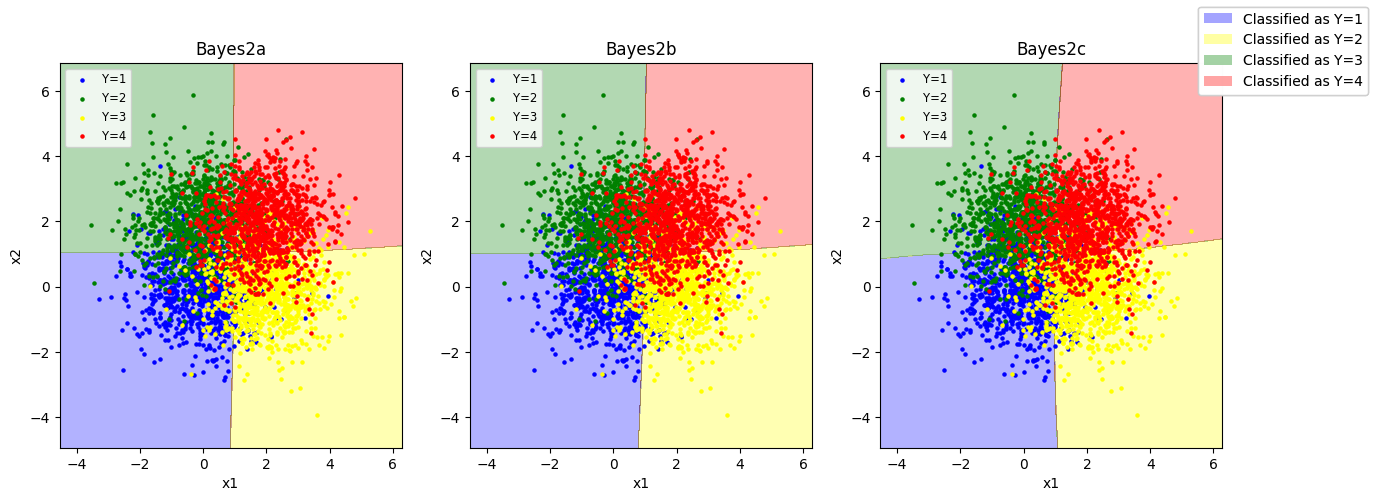

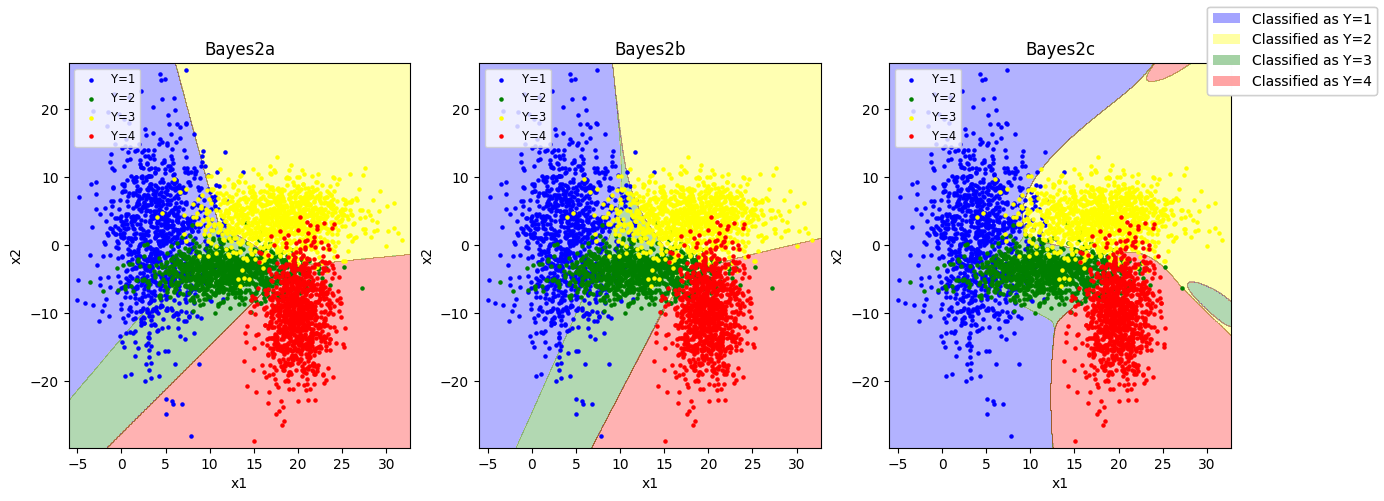

In [34]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

L = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

loss = []
confusion_matrix_final = []
error_rate = []

def confusion_matrix(Y_test, Y_pred_test):
    confusion_matrix = np.zeros((4, 4))
    for i in range(0, len(Y_test)):
        confusion_matrix[int(Y_test[i]) - 1][int(Y_pred_test[i]) - 1] += 1
    return confusion_matrix

def Plot2(filename):
    data = np.load('./dataset/'+filename)
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']

    X_train_arr = [X_train[Y_train==y] for y in range(1,5)]

    cnt_colors = ['blue', 'yellow', 'green', 'red']
    colors = ['blue', 'green', 'yellow', 'red']

    # Create meshgrid of 1000 x 1000 points
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    Y_pred = [None] * 3
    Y_pred[0] = Bayes2a(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    Y_pred[1] = Bayes2b(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    Y_pred[2] = Bayes2c(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting the decision boundaries
    for i in range(3):
        ax[i].set_xlabel('x1')
        ax[i].set_ylabel('x2')
        cf = ax[i].contourf(xx, yy, Y_pred[i], colors=cnt_colors, alpha=0.3)
        proxy = [plt.Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()[0]) for pc in cf.collections]
        artist = fig.legend(proxy, ['Classified as Y=1', 'Classified as Y=2', 'Classified as Y=3', 'Classified as Y=4'])
        for j in range(4):
            ax[i].scatter(X_train_arr[j][:, 0], X_train_arr[j][:, 1], color=colors[j], label='Y='+str(j+1), marker='.', s=20)
        ax[i].legend(loc=2, fontsize='small')
    
    ax[0].set_title('Bayes2a')
    ax[1].set_title('Bayes2b')
    ax[2].set_title('Bayes2c')
    
    plt.show()

    # Expected Loss
    Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
    Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
    Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

    loss_ = []
    loss_.append(np.sum(L[Y_test.astype(int)-1, Y_pred_test_2a.astype(int)-1])/len(Y_test))
    loss_.append(np.sum(L[Y_test.astype(int)-1, Y_pred_test_2b.astype(int)-1])/len(Y_test))
    loss_.append(np.sum(L[Y_test.astype(int)-1, Y_pred_test_2c.astype(int)-1])/len(Y_test))
    loss.append(loss_)

    # Confusion matrix
    confusion = []
    confusion.append(confusion_matrix(Y_test, Y_pred_test_2a))
    confusion.append(confusion_matrix(Y_test, Y_pred_test_2b))
    confusion.append(confusion_matrix(Y_test, Y_pred_test_2c))
    confusion_matrix_final.append(confusion)

    # Error rate
    error = []
    error.append(1 - np.sum(np.diag(confusion[0]))/np.sum(confusion[0]))
    error.append(1 - np.sum(np.diag(confusion[1]))/np.sum(confusion[1]))
    error.append(1 - np.sum(np.diag(confusion[2]))/np.sum(confusion[2]))
    error_rate.append(error)


Plot2('dataset2_1.npz')
Plot2('dataset2_2.npz')

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

## Observations and Error rates

### Expected Loss

| Dataset | Bayes2a | Bayes2b | Bayes2c |
|---------|---------|---------|---------|
| 1       | 0.42975 | 0.429   | 0.42775 |
| 2       | 0.1835  | 0.1895  | 0.14075 |

### Confusion Matrix

1. Dataset 1 on Bayes2a

| Value / Prediction | 1 | 2 | 3 | 4 |
|--------------------|---|---|---|---|
| 1                  | 633 | 219 | 136 | 12 |
| 2                  | 97 | 738 | 62 | 103 |
| 3                  | 86 | 49 | 770 | 95 |
| 4                  | 15 | 136 | 194 | 655 |

2. Dataset 1 on Bayes2b

| Value / Prediction | 1 | 2 | 3 | 4 |
|--------------------|---|---|---|---|
| 1                  | 633 | 218 | 137 | 12 |
| 2                  | 95 | 743 | 60 | 102 |
| 3                  | 84 | 49 | 773 | 94 |
| 4                  | 16 | 137 | 196 | 651 |

3. Dataset 1 on Bayes2c

| Value / Prediction | 1 | 2 | 3 | 4 |
|--------------------|---|---|---|---|
| 1                  | 634 | 217 | 138 | 11 |
| 2                  | 99 | 742 | 61 | 98 |
| 3                  | 87 | 47 | 772 | 94 |
| 4                  | 15 | 134 | 201 | 650 |

4. Dataset 2 on Bayes2a

| Value / Prediction | 1 | 2 | 3 | 4 |
|--------------------|---|---|---|---|
| 1                  | 830 | 150 | 18 | 2 |
| 2                  | 93 | 784 | 46 | 77 |
| 3                  | 30 | 61 | 905 | 4 |
| 4                  | 0 | 23 | 78 | 899 |

5. Dataset 2 on Bayes2b

| Value / Prediction | 1 | 2 | 3 | 4 |
|--------------------|---|---|---|---|
| 1                  | 891 | 106 | 3 | 0 |
| 2                  | 119 | 691 | 124 | 66 |
| 3                  | 23 | 106 | 864 | 7 |
| 4                  | 0 | 5 | 102 | 893 |

6. Dataset 2 on Bayes2c

| Value / Prediction | 1 | 2 | 3 | 4 |
|--------------------|---|---|---|---|
| 1                  | 901 | 80 | 19 | 0 |
| 2                  | 64 | 824 | 46 | 66 |
| 3                  | 19 | 31 | 936 | 14 |
| 4                  | 0 | 36 | 48 | 916 |

### Misclassification Rate

| Dataset | Bayes2a | Bayes2b | Bayes2c |
|---------|---------|---------|---------|
| 1       | 0.301   | 0.3     | 0.3005  |
| 2       | 0.1455  | 0.16525 | 0.10575 |

### Observations

1. The classifier 2c was the best classifier for the given datasets as it was able to classify the data correctly and had minimal error. This is due to minimal assumption made by the classifier.

2. The classifier 2a was the worst classifier for the given datasets as it was not able to classify the data correctly and had maximum error. This is due to maximum assumption made by the classifier.

3. For the dataset 2, the classifier 2c was able to classify the data correctly and had minimal error. This is due to the data not begin linearly seperable and the covariance matrix being different for each class. The classifier 2a and 2b were not able to classify properly because of wrong assumption made by the classifier.

Classifier 2a < Classifier 2b < Classifier 2c

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




<Figure size 640x480 with 0 Axes>

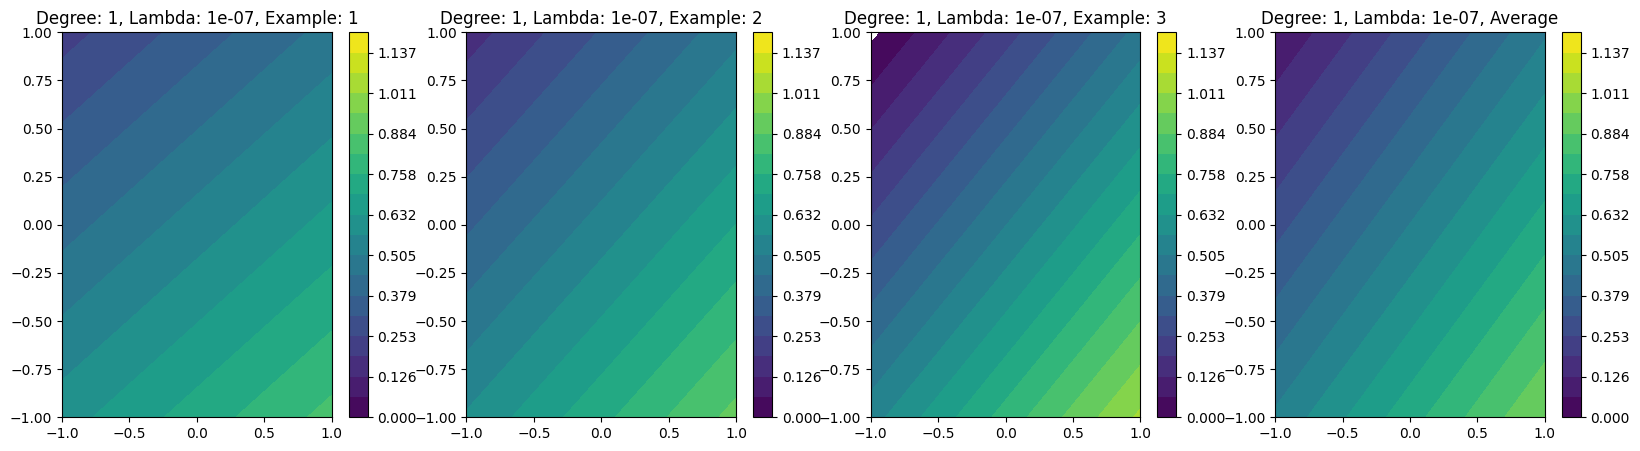

Degree= 1 lambda= 1e-07
Bias = 0.23507402066119765
Variance = 0.003933694022987978
MSE = 0.05919348921280916


<Figure size 640x480 with 0 Axes>

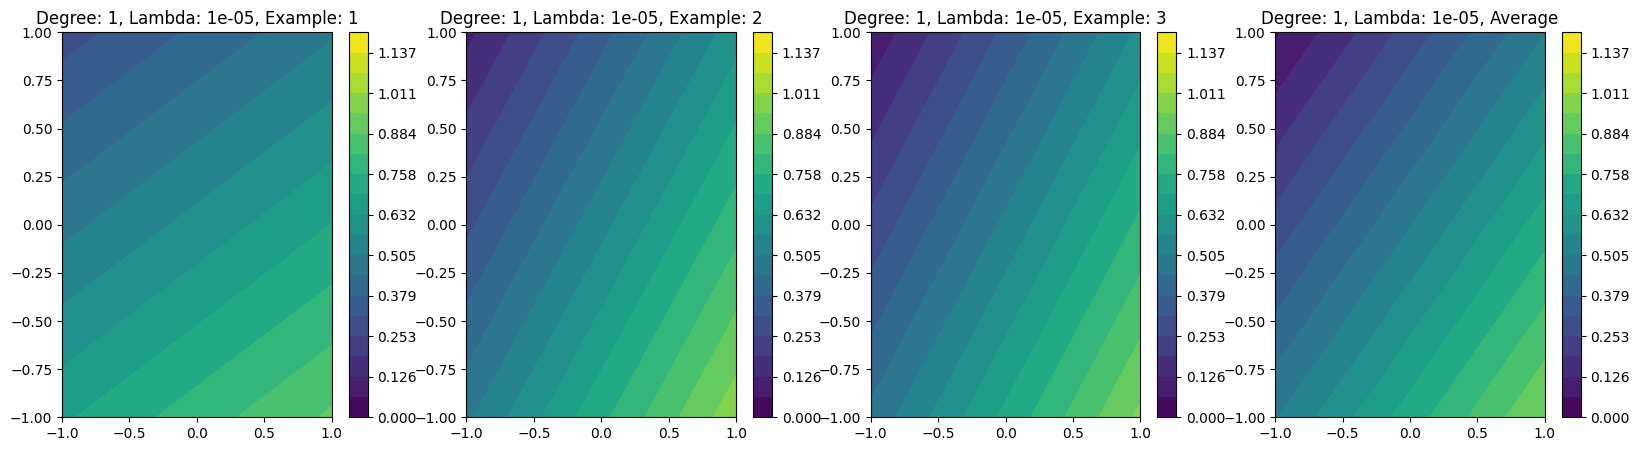

Degree= 1 lambda= 1e-05
Bias = 0.23489980231840477
Variance = 0.003466892922257078
MSE = 0.05864481005148271


<Figure size 640x480 with 0 Axes>

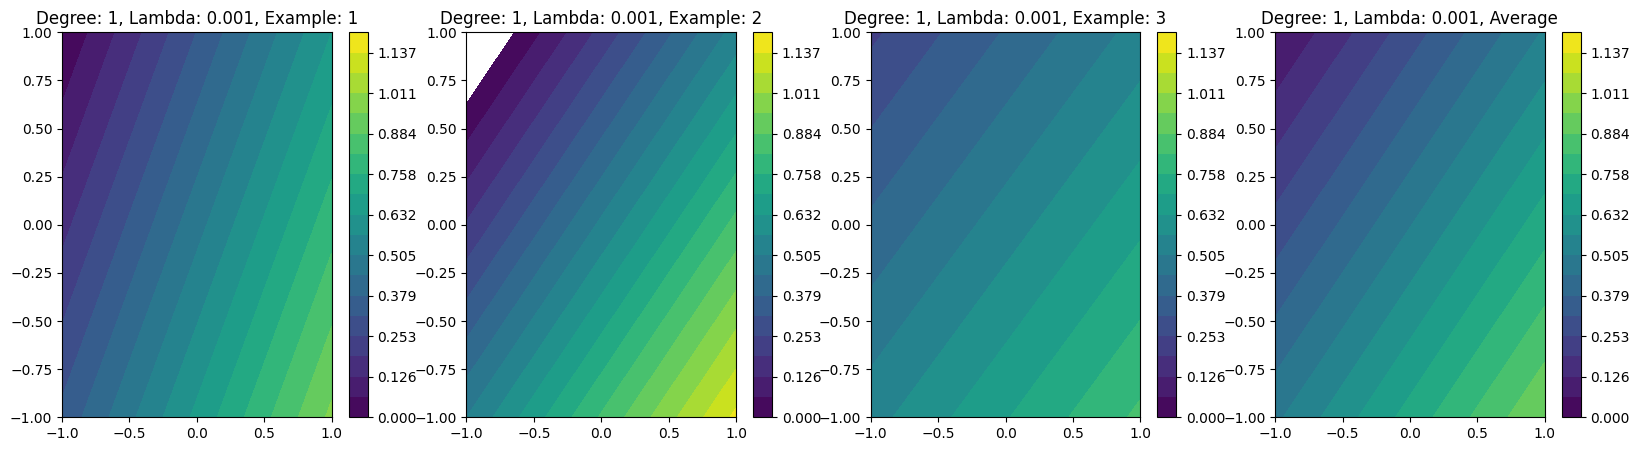

Degree= 1 lambda= 0.001
Bias = 0.2349149426326907
Variance = 0.0037758094226717142
MSE = 0.05896083969479208


<Figure size 640x480 with 0 Axes>

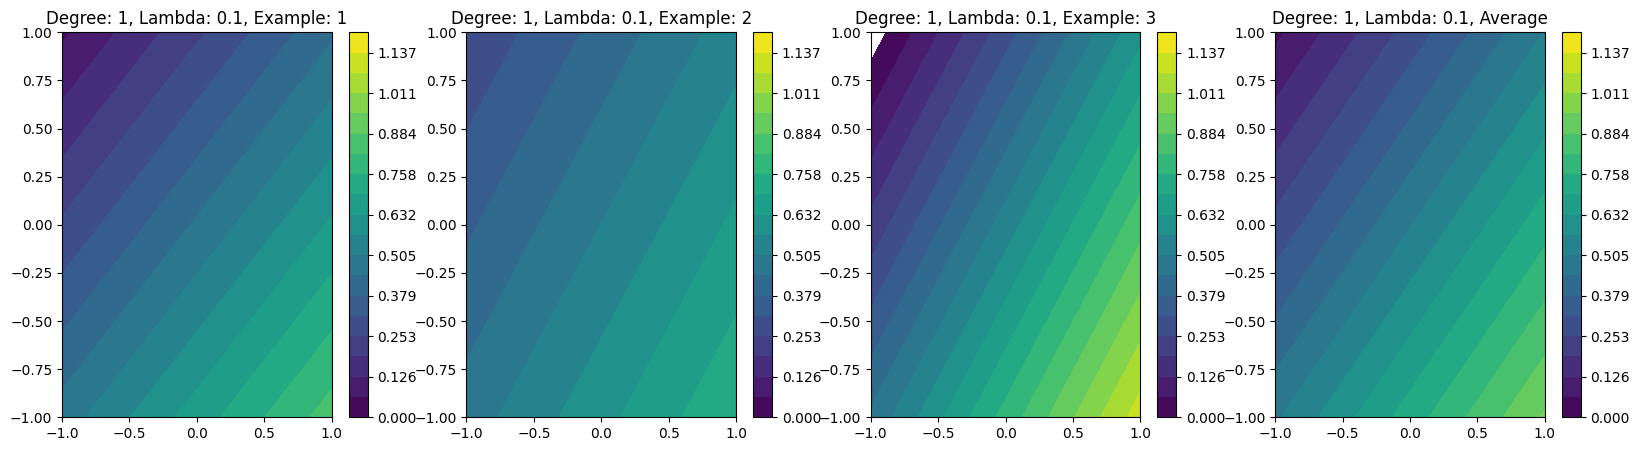

Degree= 1 lambda= 0.1
Bias = 0.23498565573673663
Variance = 0.003276088410279214
MSE = 0.058494346812303324


<Figure size 640x480 with 0 Axes>

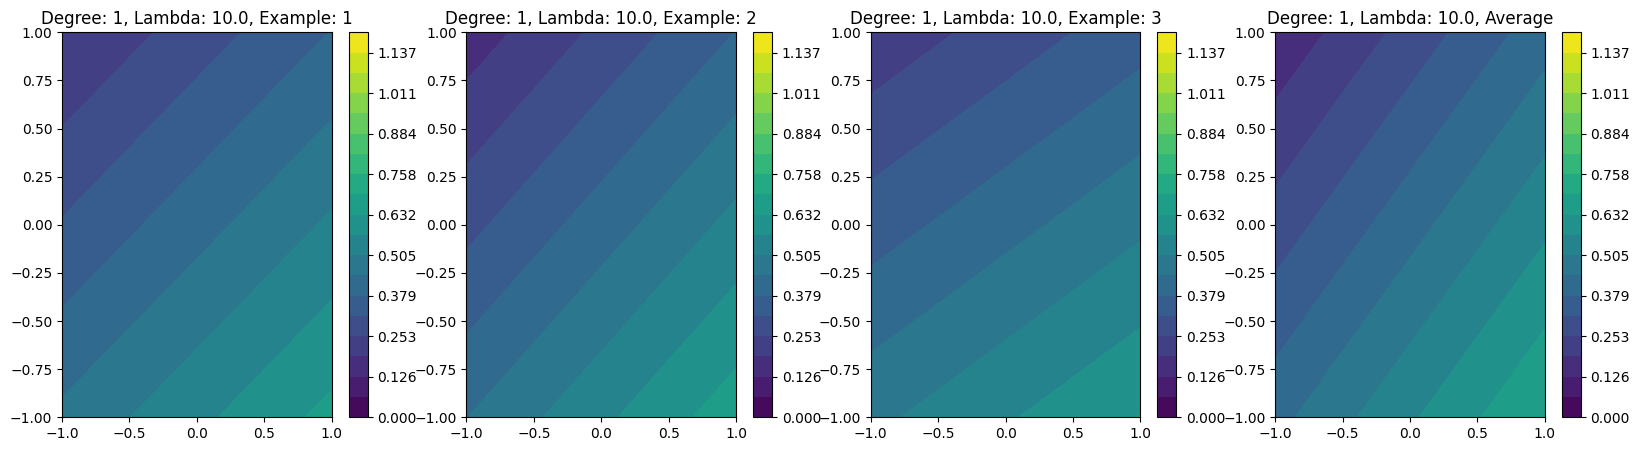

Degree= 1 lambda= 10.0
Bias = 0.25498790280651246
Variance = 0.0017863312725983089
MSE = 0.06680516185026174


<Figure size 640x480 with 0 Axes>

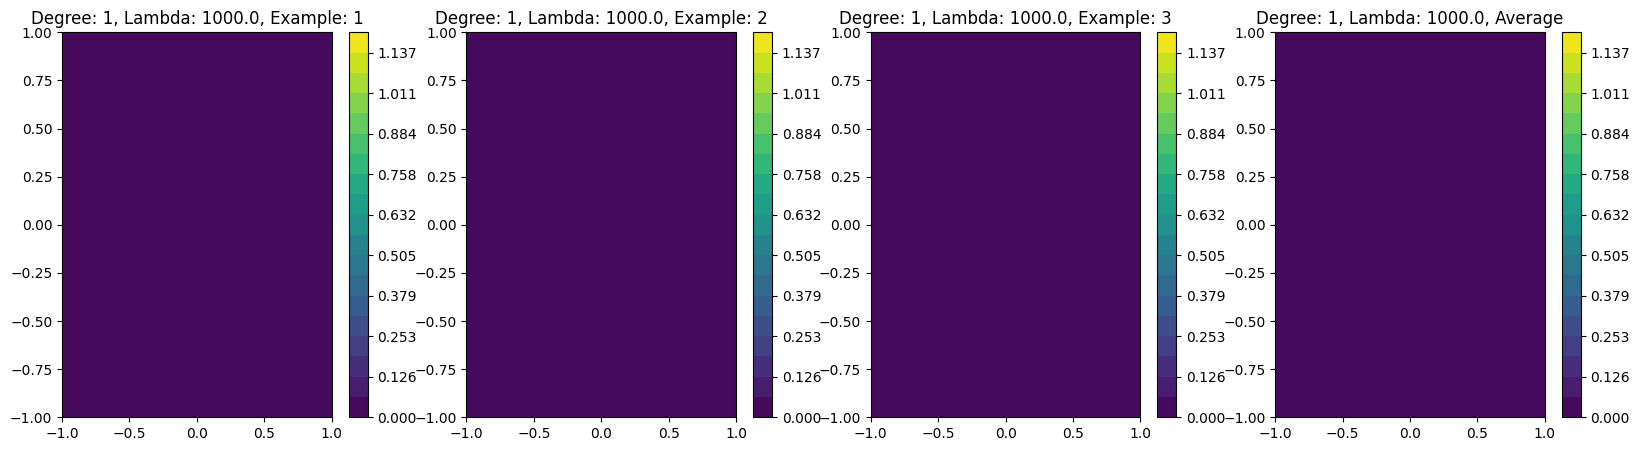

Degree= 1 lambda= 1000.0
Bias = 0.5545037859528666
Variance = 6.708295485926363e-06
MSE = 0.30748115693154854


<Figure size 640x480 with 0 Axes>

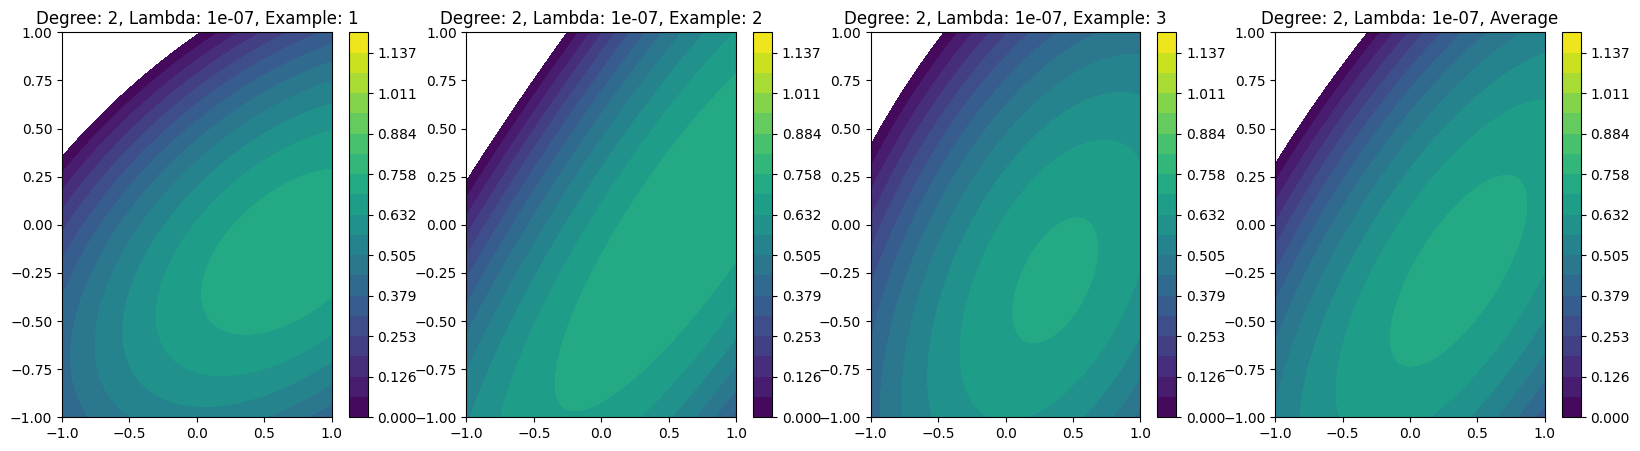

Degree= 2 lambda= 1e-07
Bias = 0.18669610008517967
Variance = 0.005361106721225155
MSE = 0.04021654050824058


<Figure size 640x480 with 0 Axes>

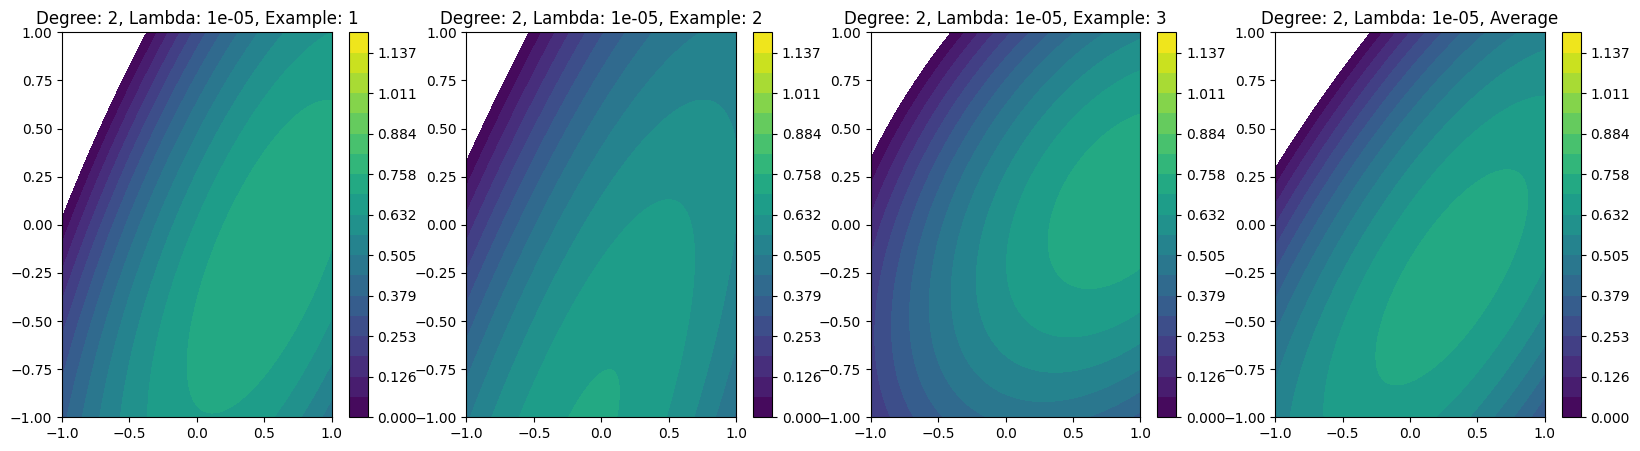

Degree= 2 lambda= 1e-05
Bias = 0.1875515467852534
Variance = 0.0062818677405224645
MSE = 0.041457450442063566


<Figure size 640x480 with 0 Axes>

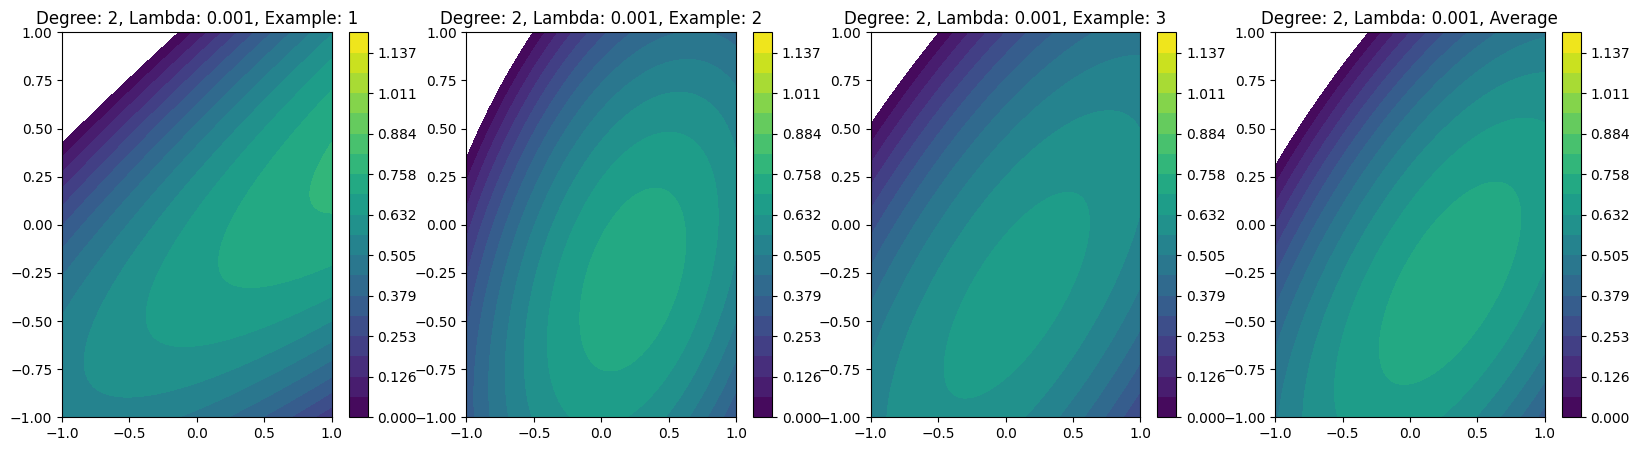

Degree= 2 lambda= 0.001
Bias = 0.1865341153750507
Variance = 0.0057675276996776
MSE = 0.04056250389843034


<Figure size 640x480 with 0 Axes>

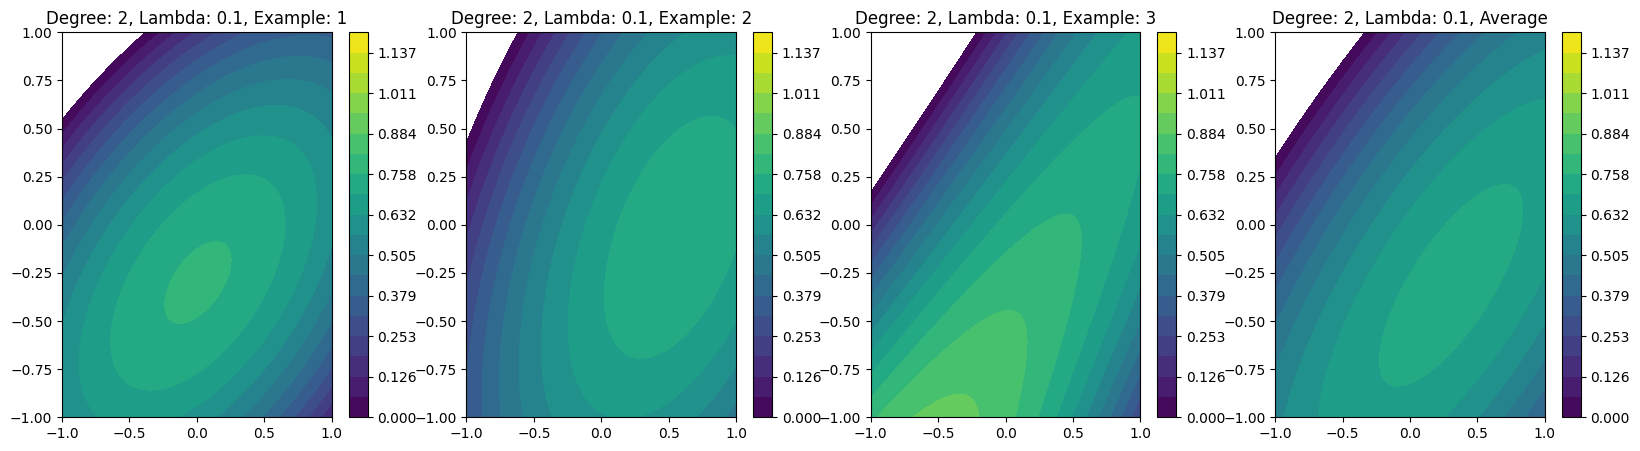

Degree= 2 lambda= 0.1
Bias = 0.18715096826290403
Variance = 0.005320733579688476
MSE = 0.04034621850143099


<Figure size 640x480 with 0 Axes>

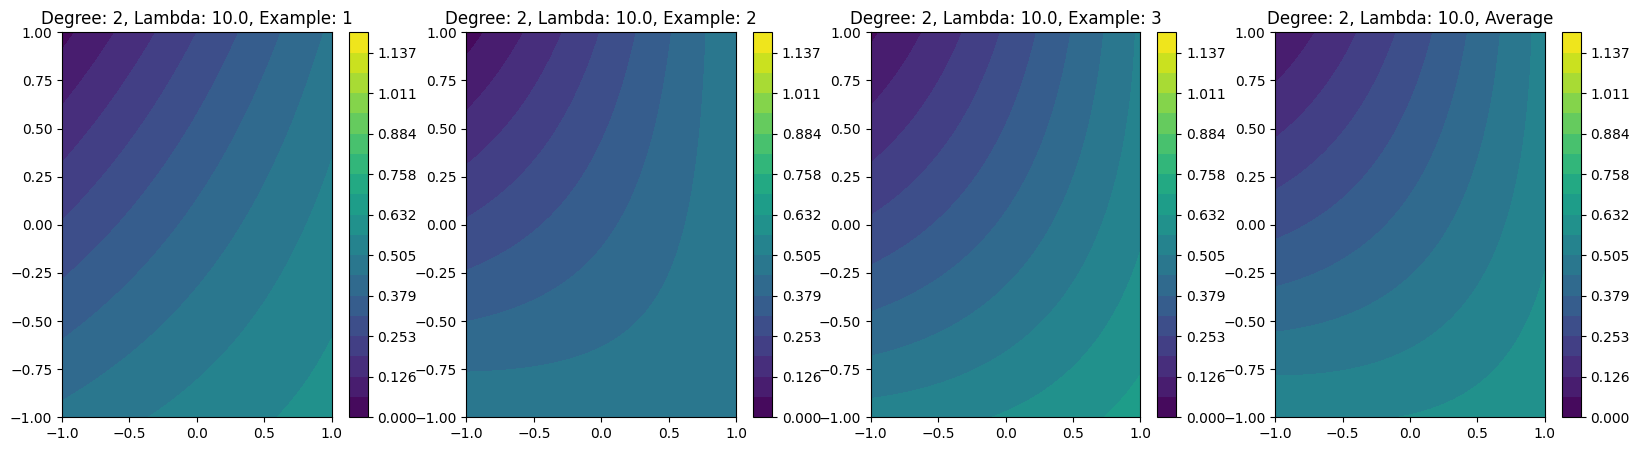

Degree= 2 lambda= 10.0
Bias = 0.24914911676004323
Variance = 0.0016439082689456055
MSE = 0.06371919065125527


<Figure size 640x480 with 0 Axes>

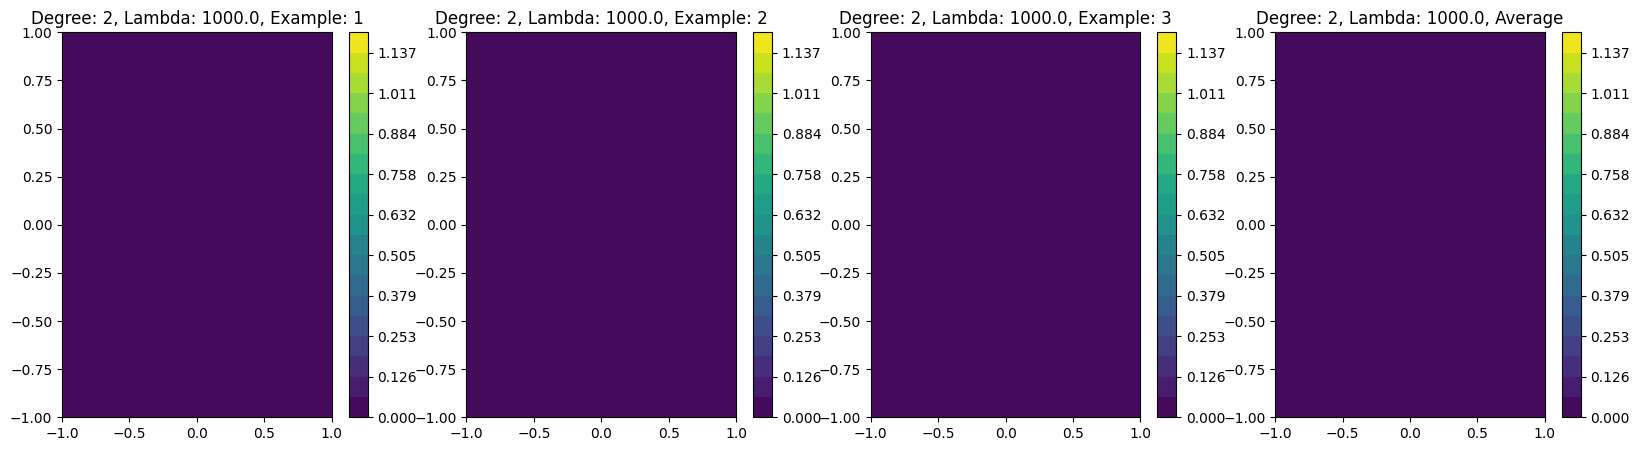

Degree= 2 lambda= 1000.0
Bias = 0.5513543843998481
Variance = 8.697571559598478e-06
MSE = 0.30400035476849496


<Figure size 640x480 with 0 Axes>

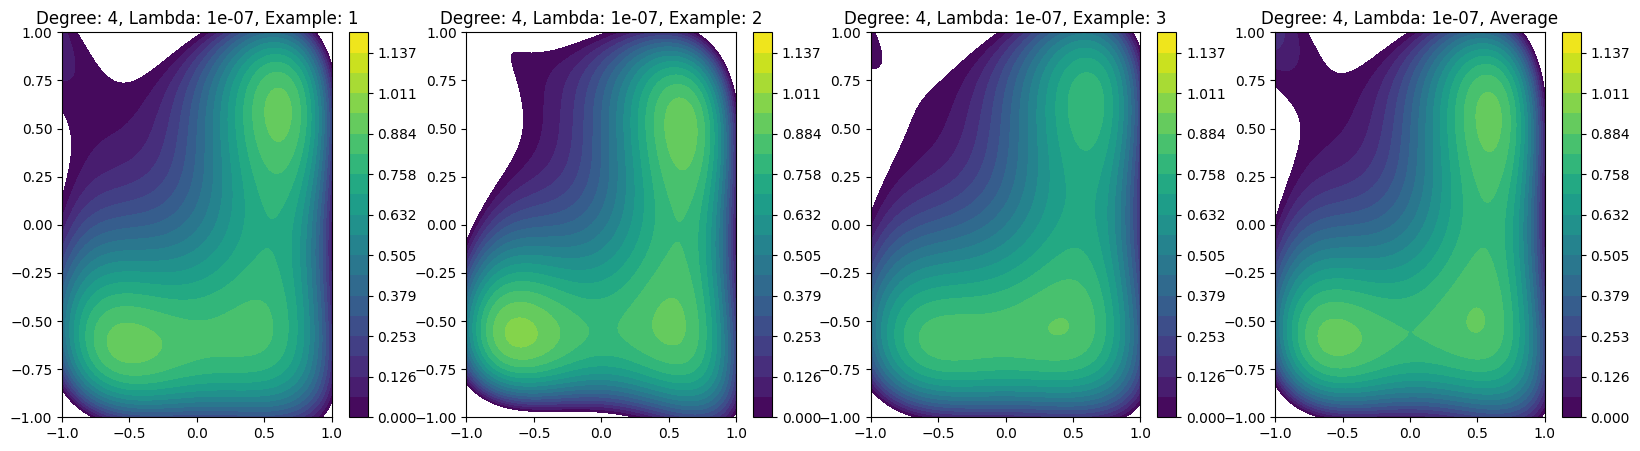

Degree= 4 lambda= 1e-07
Bias = 0.0925172235890288
Variance = 0.008239037675142022
MSE = 0.01679847433576437


<Figure size 640x480 with 0 Axes>

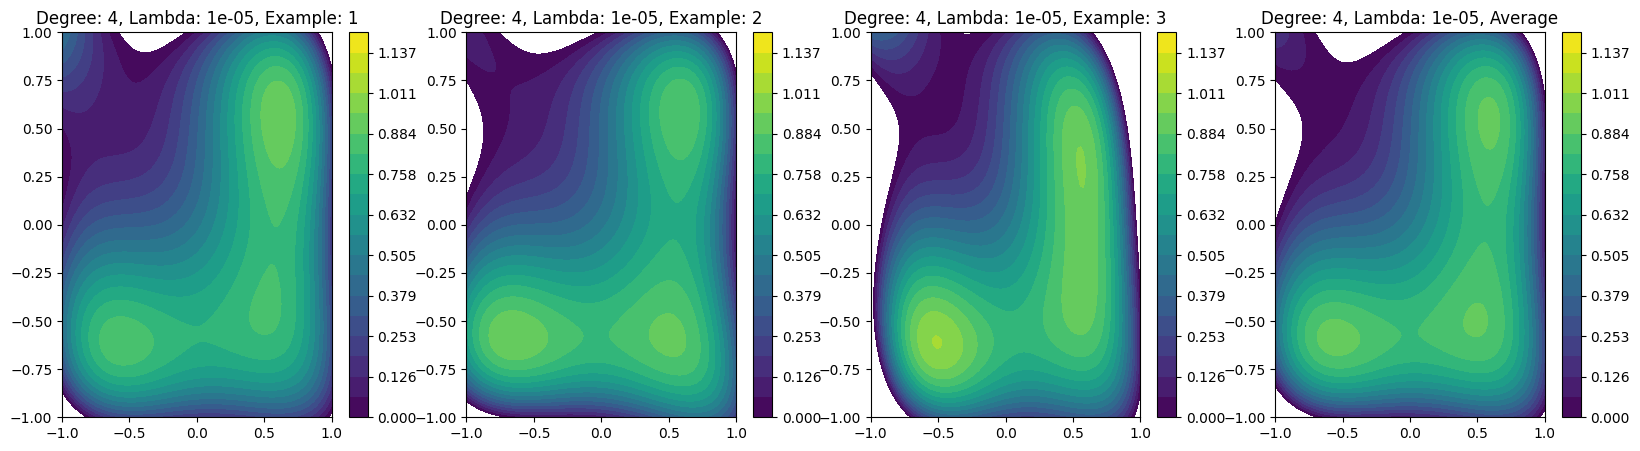

Degree= 4 lambda= 1e-05
Bias = 0.09280783565062367
Variance = 0.00885105941354778
MSE = 0.017464353771700955


<Figure size 640x480 with 0 Axes>

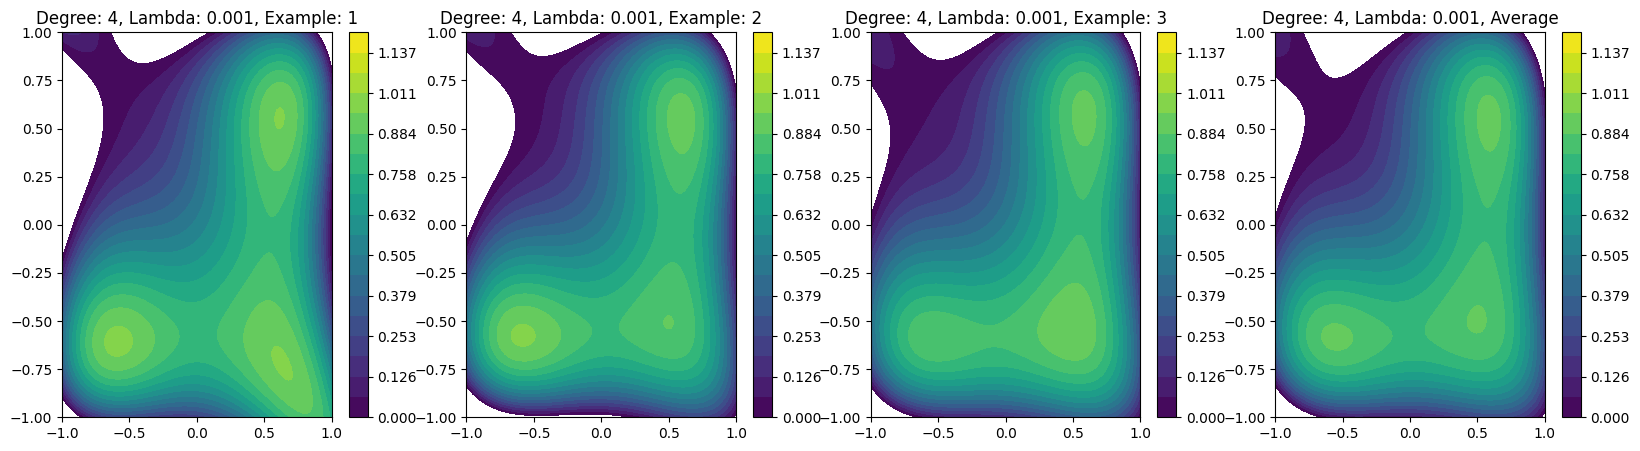

Degree= 4 lambda= 0.001
Bias = 0.09245506998796557
Variance = 0.009713598580999717
MSE = 0.01826153854747933


<Figure size 640x480 with 0 Axes>

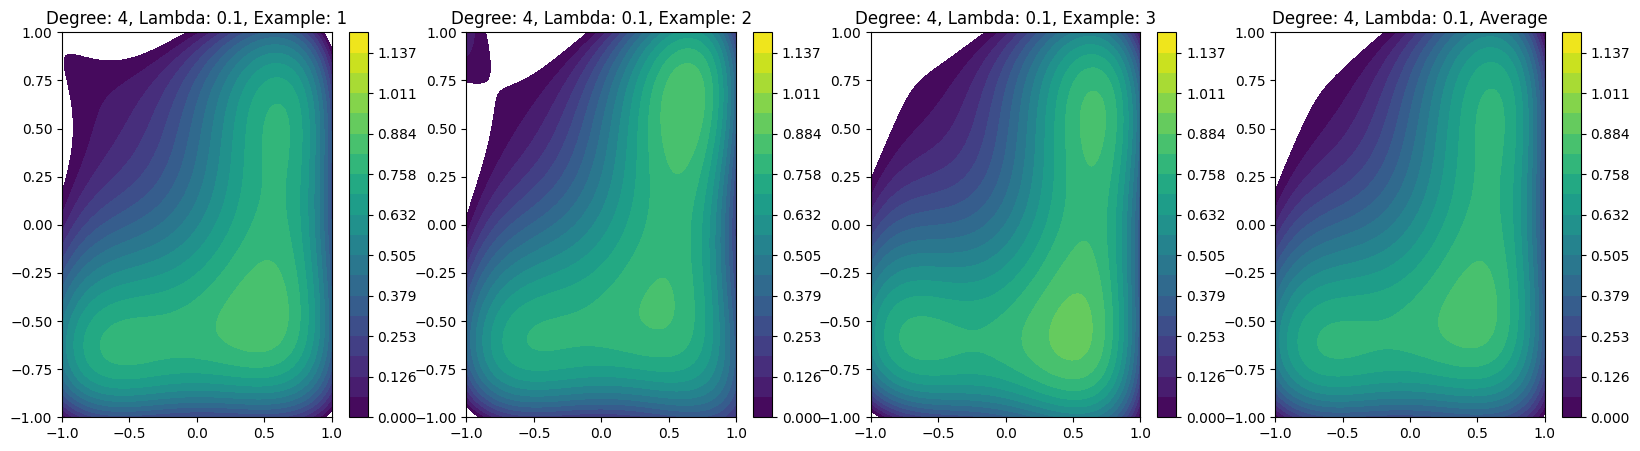

Degree= 4 lambda= 0.1
Bias = 0.09589834216391038
Variance = 0.00449708572127915
MSE = 0.01369357775106558


<Figure size 640x480 with 0 Axes>

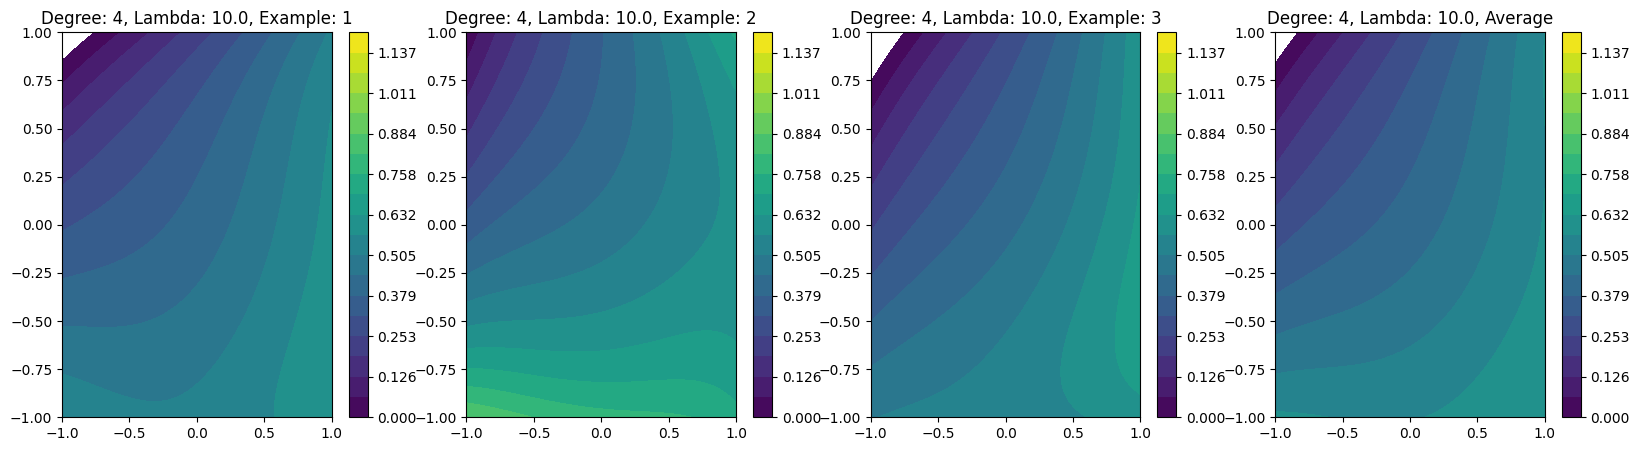

Degree= 4 lambda= 10.0
Bias = 0.2430207148940558
Variance = 0.0024216941859531507
MSE = 0.06148076205357111


<Figure size 640x480 with 0 Axes>

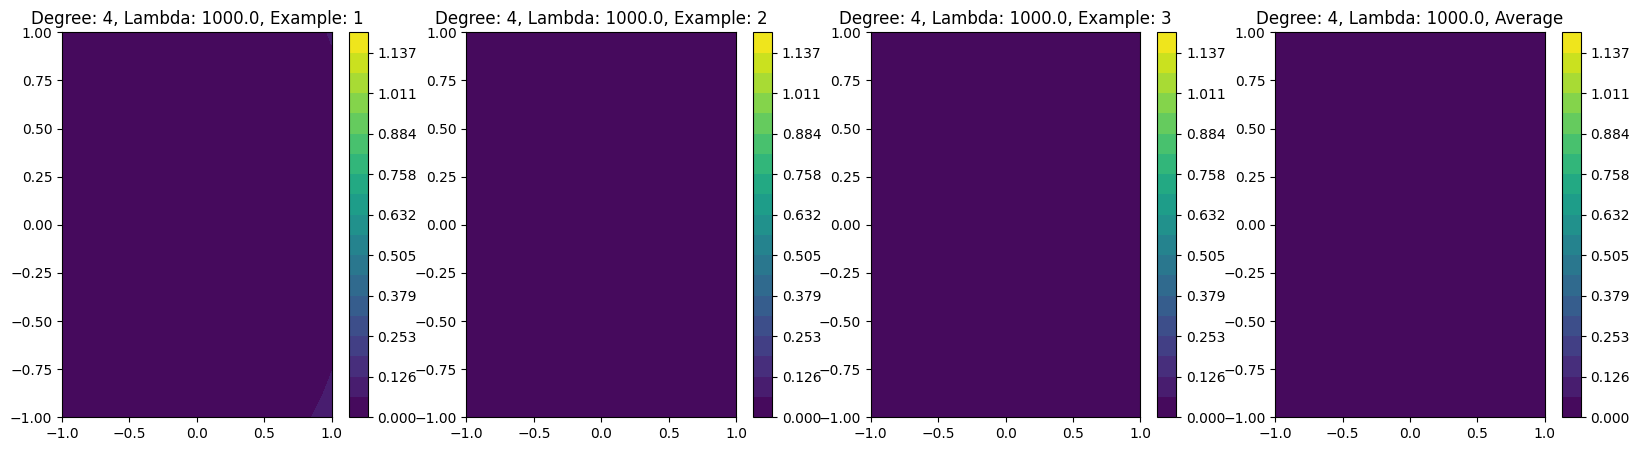

Degree= 4 lambda= 1000.0
Bias = 0.5498912435667052
Variance = 1.0606492405857525e-05
MSE = 0.30239098624374333


<Figure size 640x480 with 0 Axes>

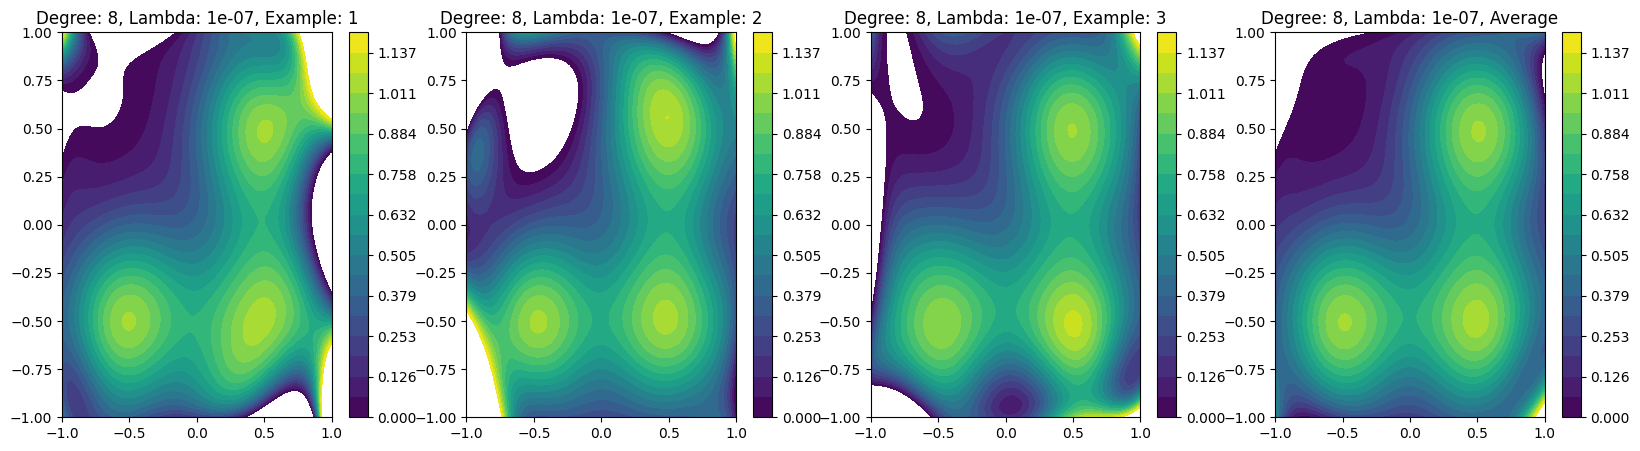

Degree= 8 lambda= 1e-07
Bias = 0.08926492703463994
Variance = 0.17890955366321631
MSE = 0.18687778086171591


<Figure size 640x480 with 0 Axes>

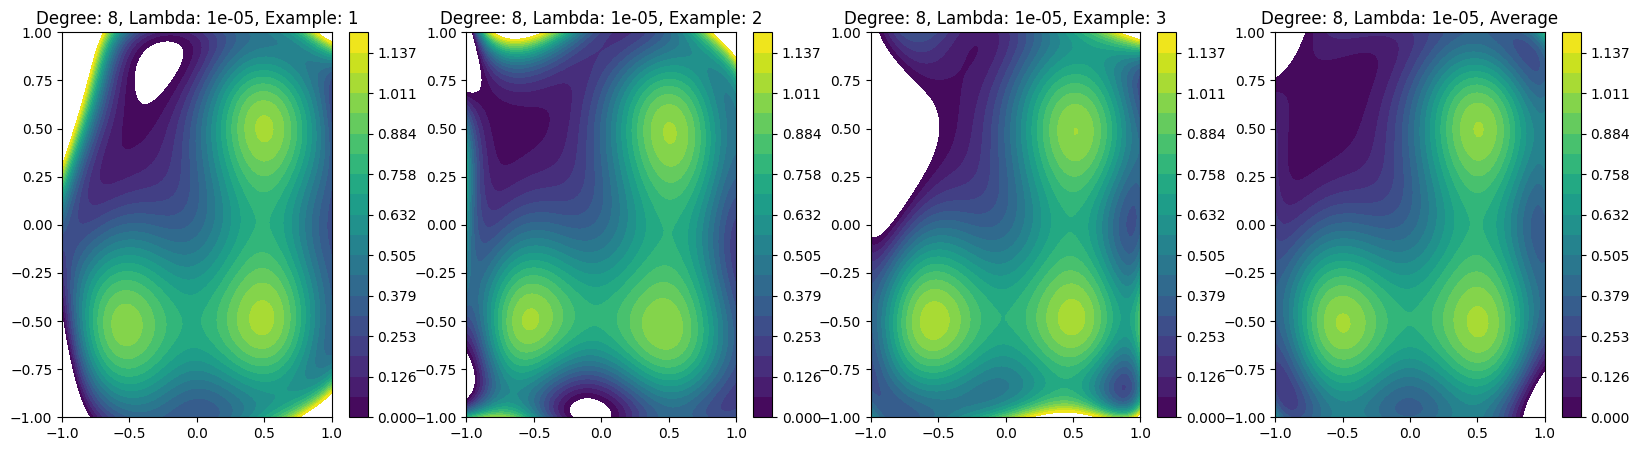

Degree= 8 lambda= 1e-05
Bias = 0.05802833595028188
Variance = 0.05638816490530734
MSE = 0.05975545267846612


<Figure size 640x480 with 0 Axes>

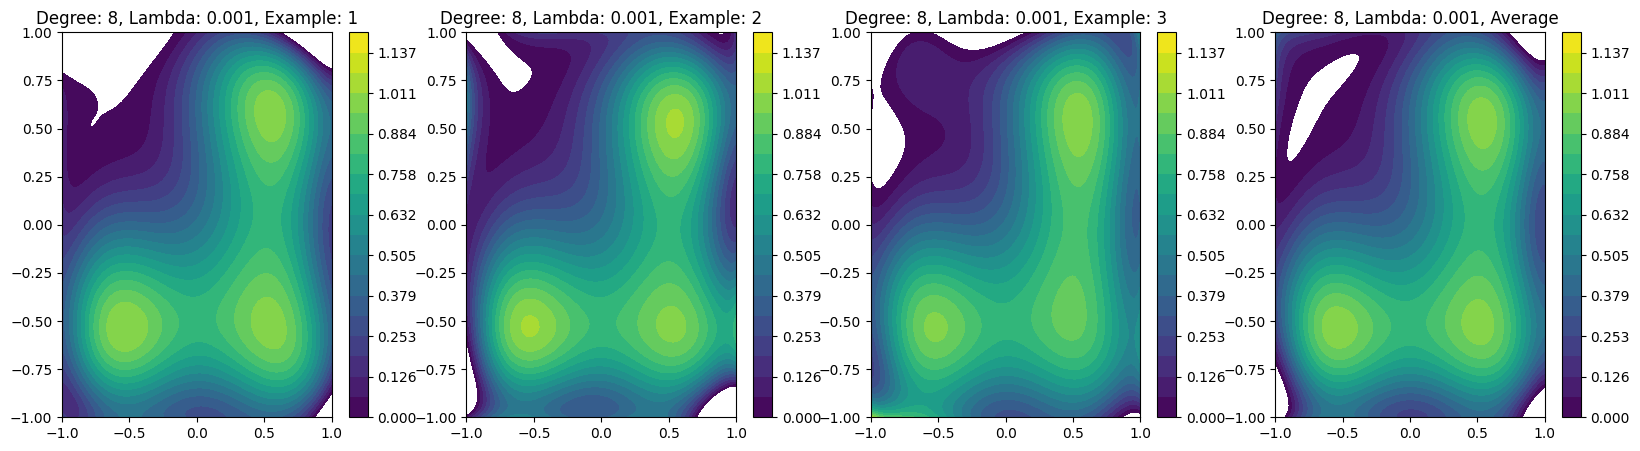

Degree= 8 lambda= 0.001
Bias = 0.0722011975246027
Variance = 0.02125643186160022
MSE = 0.026469444785586917


<Figure size 640x480 with 0 Axes>

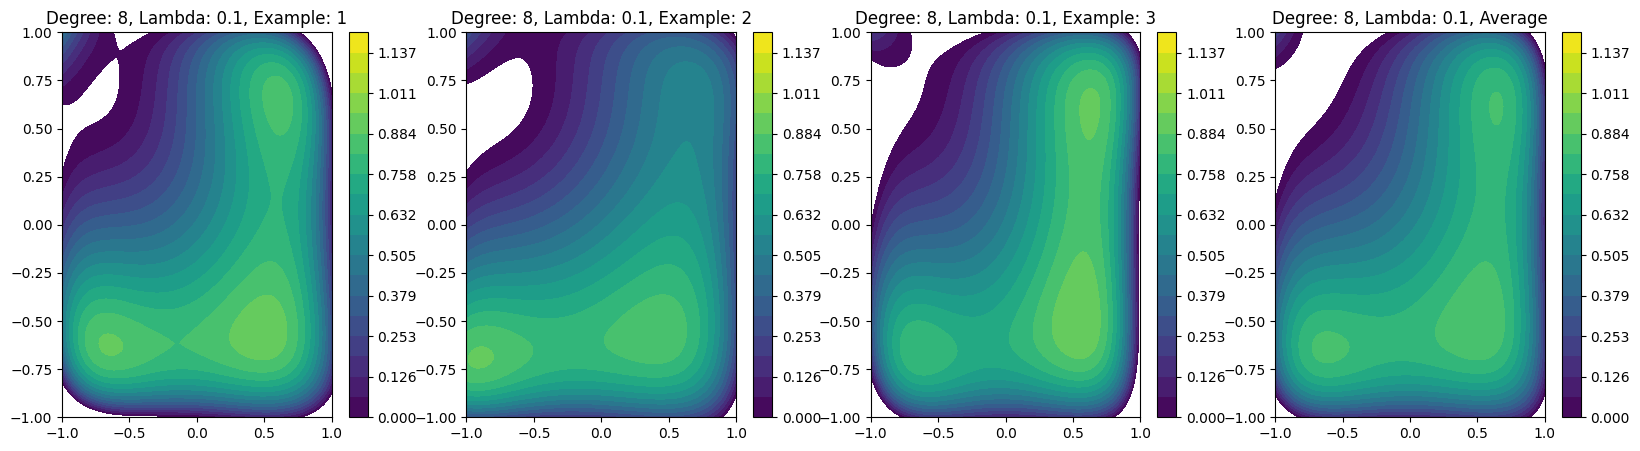

Degree= 8 lambda= 0.1
Bias = 0.09873341907236967
Variance = 0.008003549853796726
MSE = 0.017751837895516896


<Figure size 640x480 with 0 Axes>

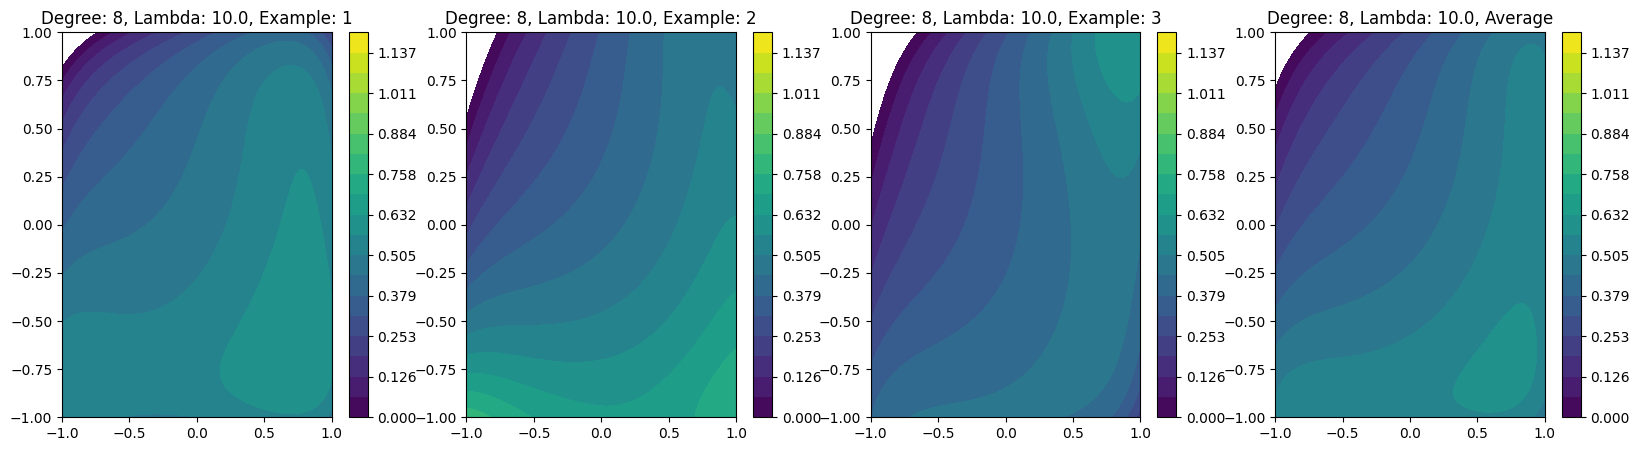

Degree= 8 lambda= 10.0
Bias = 0.23585665958658097
Variance = 0.002498453396186427
MSE = 0.05812681726752676


<Figure size 640x480 with 0 Axes>

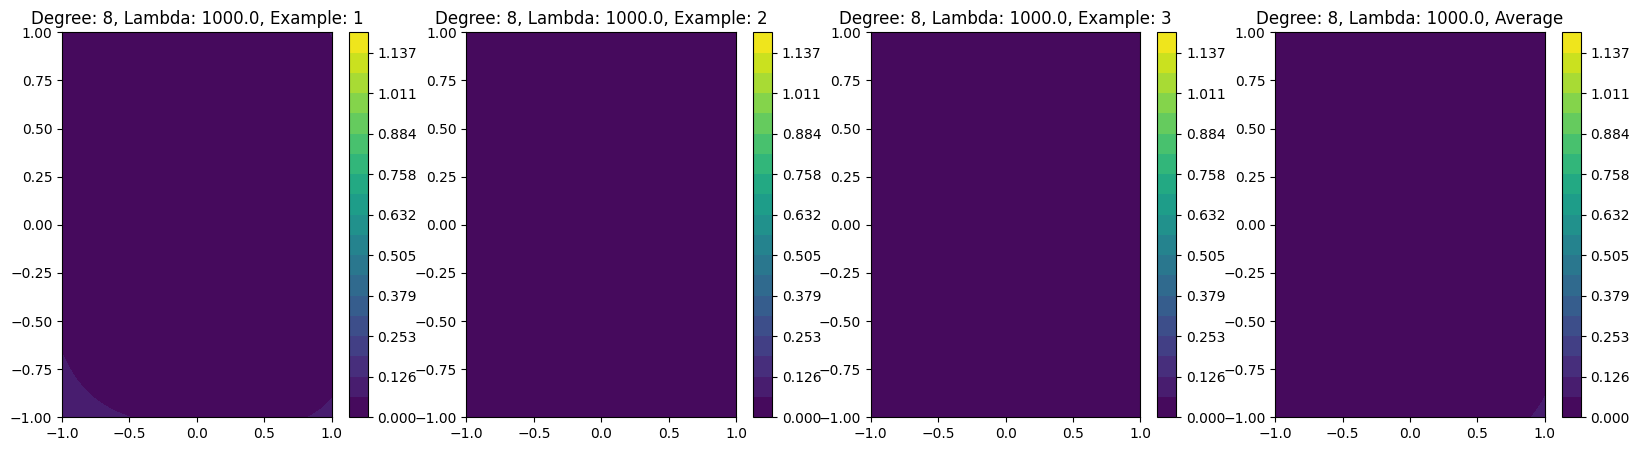

Degree= 8 lambda= 1000.0
Bias = 0.5492094095343681
Variance = 1.3319660255686144e-05
MSE = 0.30164429518134495


<Figure size 640x480 with 0 Axes>

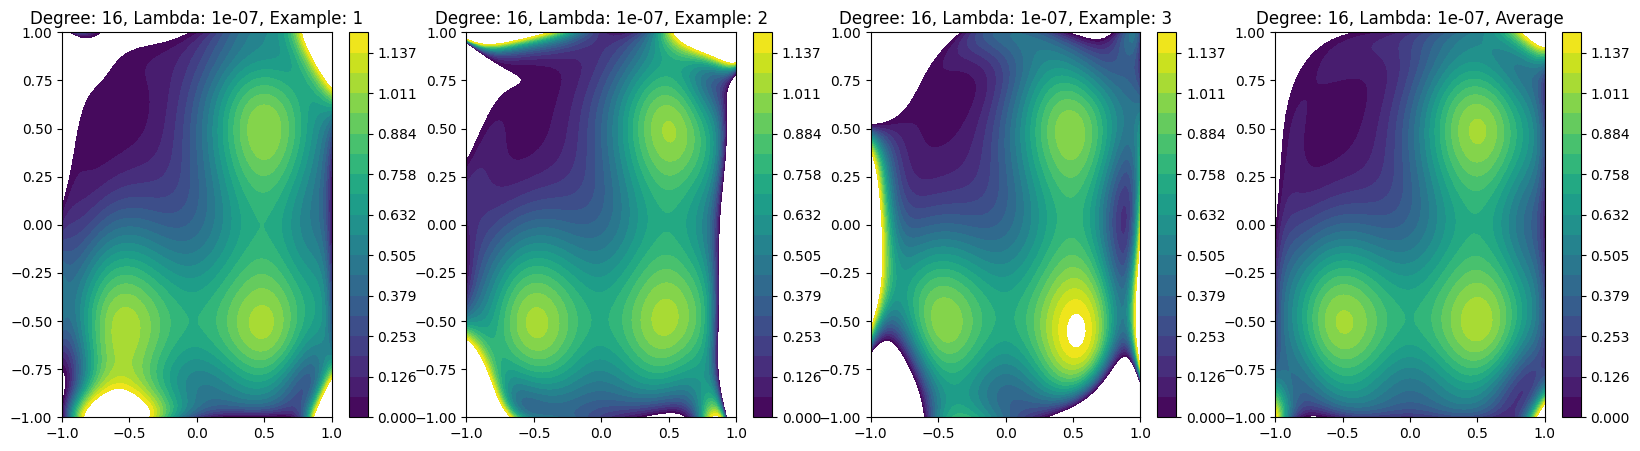

Degree= 16 lambda= 1e-07
Bias = 0.1307011673115131
Variance = 0.4085283771875781
MSE = 0.4256111723241703


<Figure size 640x480 with 0 Axes>

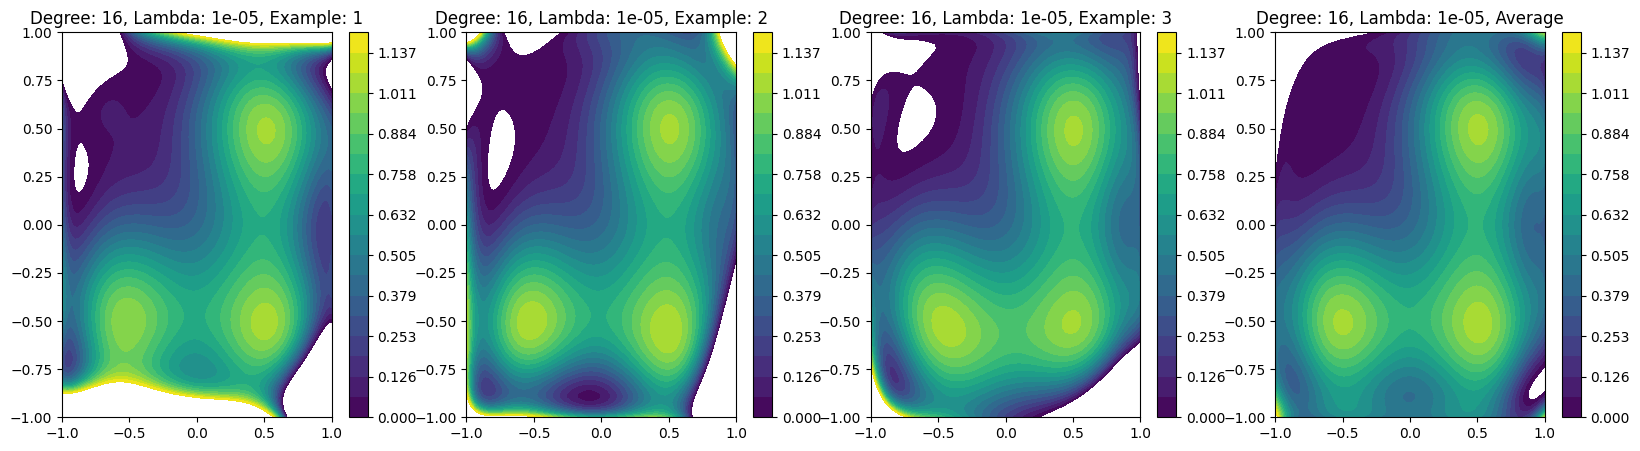

Degree= 16 lambda= 1e-05
Bias = 0.11189772707309456
Variance = 0.1975345744671707
MSE = 0.21005567579129547


<Figure size 640x480 with 0 Axes>

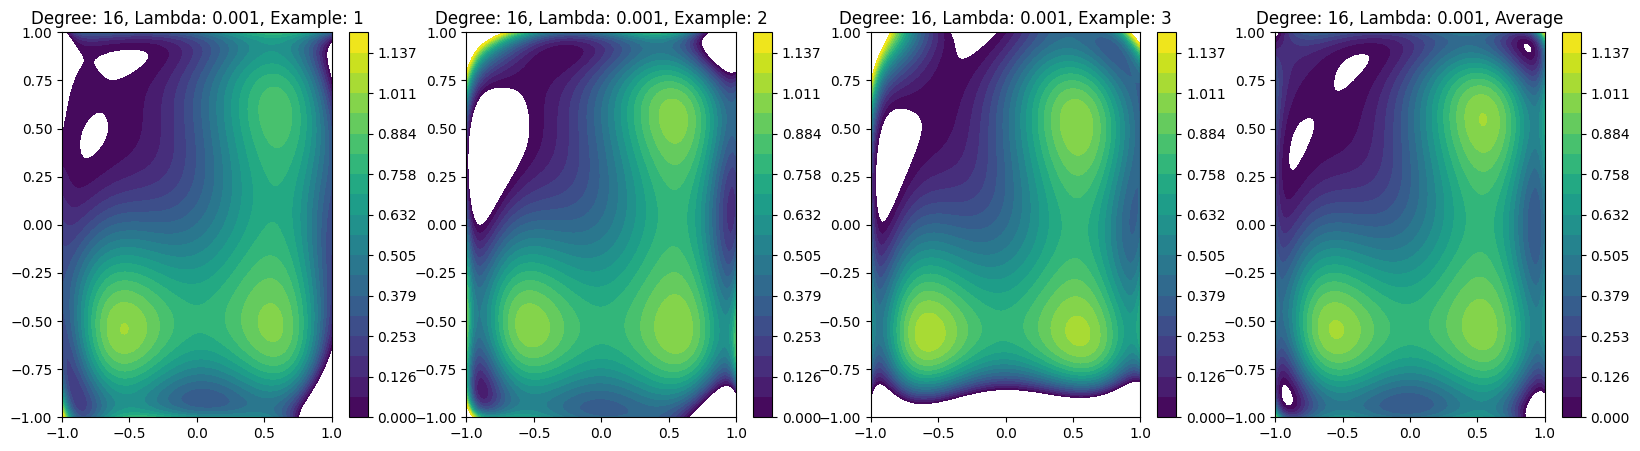

Degree= 16 lambda= 0.001
Bias = 0.0799396616911935
Variance = 0.06547414249415957
MSE = 0.07186449200546205


<Figure size 640x480 with 0 Axes>

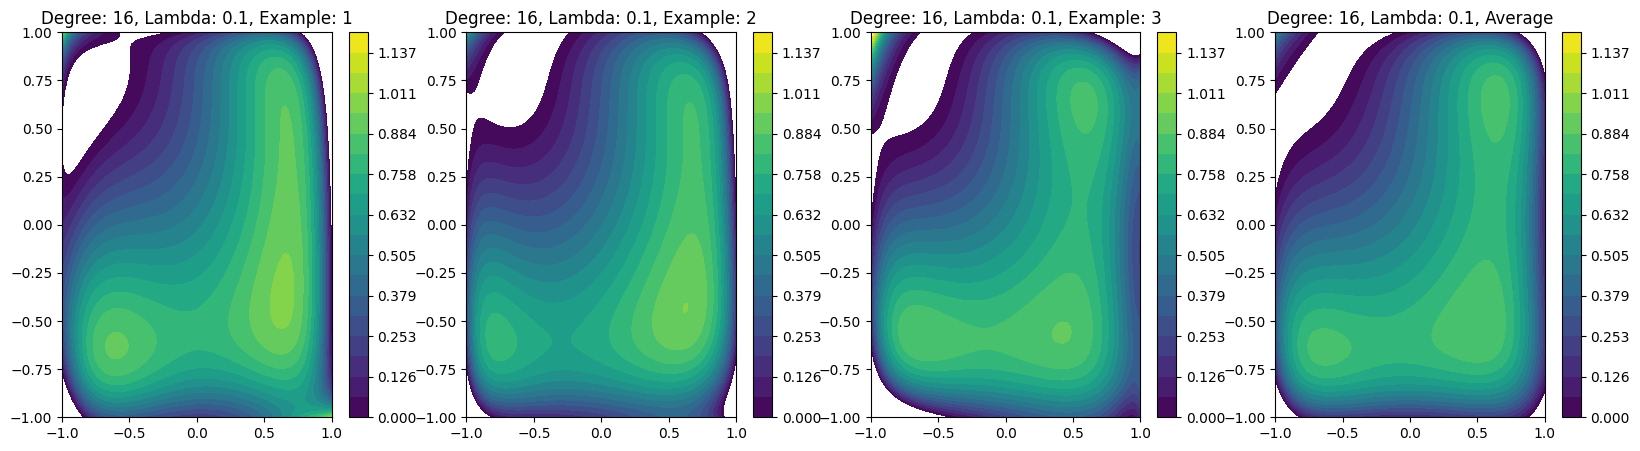

Degree= 16 lambda= 0.1
Bias = 0.10851650030572865
Variance = 0.01181446882625023
MSE = 0.02359029966485344


<Figure size 640x480 with 0 Axes>

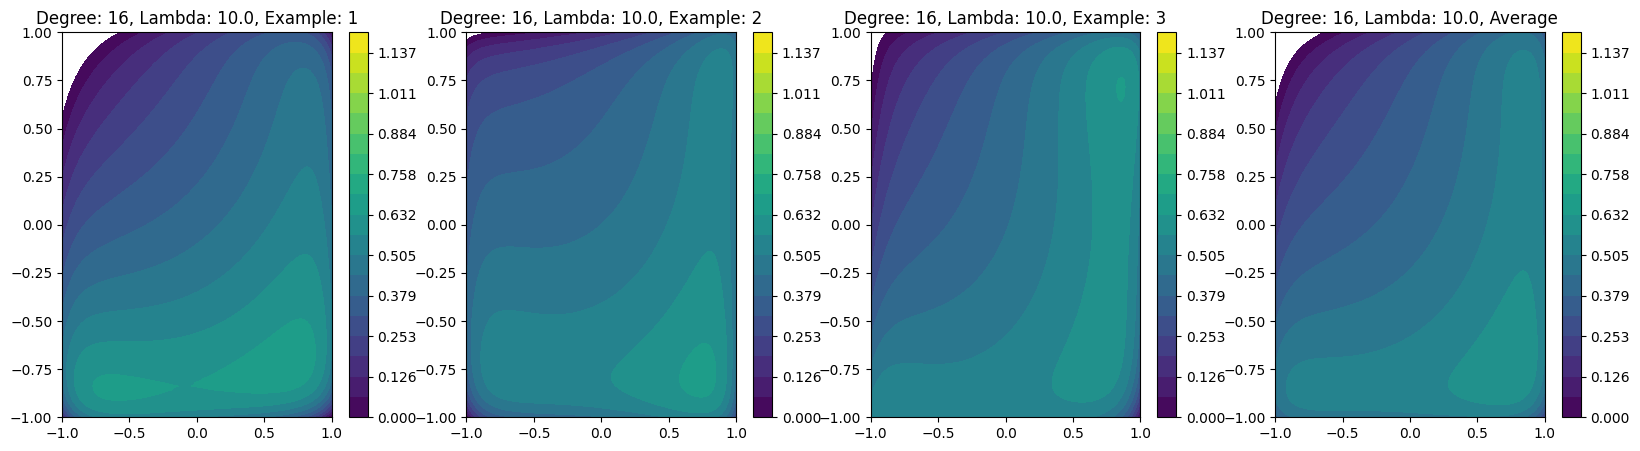

Degree= 16 lambda= 10.0
Bias = 0.2318522417729487
Variance = 0.002981221803539588
MSE = 0.05673668381868144


<Figure size 640x480 with 0 Axes>

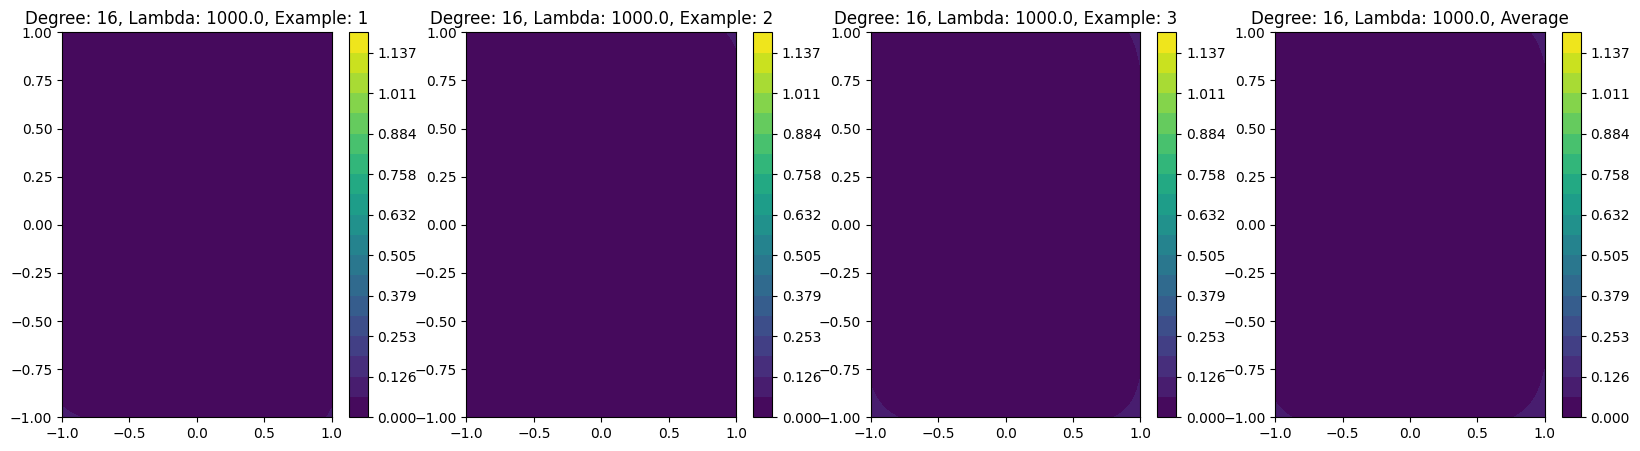

Degree= 16 lambda= 1000.0
Bias = 0.5485917090185723
Variance = 1.758978365495683e-05
MSE = 0.3009704529875729


In [50]:
# Cell type : CodeWrite

def create_polynomial_features(X, degree):
    """ Create polynomial features of degree d from X.

    Arguments:
    X : numpy array of shape (n,d)
    degree : integer

    Returns:
    X_poly : numpy array of shape (n, d*(d+1)/2)
    """
    X_poly = np.array([np.array([x[0] ** i * x[1] ** j for i in range(degree + 1) for j in range(degree + 1) if i + j <= degree]) for x in X])
    return X_poly

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    X_poly = create_polynomial_features(X_test, degree)
    Y_test_pred = np.dot(X_poly, wt_vector)
    return Y_test_pred

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    # Create a grid of points
    x1 = np.linspace(-1, 1, 100)
    x2 = np.linspace(-1, 1, 100)
    x1, x2 = np.meshgrid(x1, x2)
    X_test = np.array([x1, x2]).reshape(2, -1).T
    Y_test = np.exp(-4 * np.linalg.norm(X_test - np.array([0.5, 0.5]), axis=1) ** 2) + np.exp(-4 * np.linalg.norm(X_test - np.array([-0.5, -0.5]), axis=1) ** 2) + np.exp(-4 * np.linalg.norm(X_test - np.array([0.5, -0.5]), axis=1) ** 2)
    
    # Compute the polynomial function value
    Y_test_pred = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
    
    # Plot the contour plot
    plt.contourf(x1, x2, Y_test_pred.reshape(100, 100), levels=np.linspace(0,1.2,20))
    plt.colorbar()
    plt.title(title)
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    # Create the feature matrix
    X_train_poly = create_polynomial_features(X_train, degree)
    
    # Compute the weight vector
    w = np.dot(np.dot(np.linalg.inv(np.dot(X_train_poly.T, X_train_poly) + reg_param * np.eye(X_train_poly.shape[1])), X_train_poly.T), Y_train)
    
    return w
    

    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    # Initialize
    runs = 100
    plt.figure(figsize=(20, 5))
    
    # Create a grid of points
    x1 = np.linspace(-1, 1, 100)
    x2 = np.linspace(-1, 1, 100)
    x1, x2 = np.meshgrid(x1, x2)
    x_train = np.array([x1, x2]).reshape(2, -1).T
    y_train = np.exp(-4 * np.linalg.norm(x_train - np.array([0.5, 0.5]), axis=1) ** 2) + np.exp(-4 * np.linalg.norm(x_train - np.array([-0.5, -0.5]), axis=1) ** 2) + np.exp(-4 * np.linalg.norm(x_train - np.array([0.5, -0.5]), axis=1) ** 2)

    # Run the experiment 100 times
    wt_vector = np.zeros((runs, (degree + 1) * (degree + 2) // 2))
    y_train_pred = np.zeros((runs, 10000))
    for i in range(runs):
        # Choose random samples for training
        X_train = np.random.uniform(-1, 1, (num_training_samples, 2))
        Y_train = np.exp(-4 * np.linalg.norm(X_train - np.array([0.5, 0.5]), axis=1) ** 2) + np.exp(-4 * np.linalg.norm(X_train - np.array([-0.5, -0.5]), axis=1) ** 2) + np.exp(-4 * np.linalg.norm(X_train - np.array([0.5, -0.5]), axis=1) ** 2)

        # Fit the polynomial
        wt_vector[i] = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
        
        # Compute the prediction on the train data
        y_train_pred[i] = polynomial_regression_ridge_pred(x_train, wt_vector[i], degree)
        
        if i < 3:
            plt.subplot(1, 4, i + 1)
            # Visualise the learned function
            visualise_polynomial_2d(wt_vector[i], degree, title="Degree: {}, Lambda: {}, Example: {}".format(degree, reg_param, i+1))

    # Compute the average function
    wt_avg = np.mean(wt_vector, axis=0)
    plt.subplot(1, 4, 4)
    visualise_polynomial_2d(wt_avg, degree, title="Degree: {}, Lambda: {}, Average".format(degree, reg_param))
    plt.show()
    
    y_avg_pred = polynomial_regression_ridge_pred(x_train, wt_avg, degree)

    # Compute the bias, variance and mean squared error
    bias_sq = np.mean((y_train - y_avg_pred) ** 2)
    variance = np.mean(np.mean((y_train_pred - y_avg_pred) ** 2, axis=0))
    mean_squared_error = bias_sq + variance

    return np.sqrt(bias_sq), variance, mean_squared_error

bias = []
var = []
mse = []
for i,degree in enumerate([1,2,4,8,16]):
    bias.append([])
    var.append([])
    mse.append([])
    for j,reg_param in enumerate([1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]):
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))

        bias[i].append(b)
        var[i].append(v)
        mse[i].append(e)
        

In [53]:
# Cell type: convenience

# for i,degree in enumerate([1,2,4,8,16]):
#     print('Degree = '+str(degree))
#     print('Bias = '+str(bias[i]))

# for i,degree in enumerate([1,2,4,8,16]):
#     print('Degree = '+str(degree))
#     print('Variance = '+str(var[i]))

# for i,degree in enumerate([1,2,4,8,16]):
#     print('Degree = '+str(degree))
#     print('MSE = '+str(mse[i]))

** Cell type: TextWrite **

# Observations and Tables

## Bias Table

| Degree \ lambda | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 | 1e3 |
|:---------------:|:----:|:----:|:----:|:----:|:---:|:---:|
|        1        | 0.23507402066119765 | 0.23489980231840477 | 0.2349149426326907 | 0.23498565573673663 | 0.25498790280651246 | 0.5545037859528666 |
|        2        | 0.18669610008517967 | 0.1875515467852534 | 0.1865341153750507 | 0.18715096826290403 | 0.24914911676004323 | 0.5513543843998481 |
|        4        | 0.0925172235890288 | 0.09280783565062367 | 0.09245506998796557 | 0.09589834216391038 | 0.2430207148940558 | 0.5498912435667052 |
|        8        | 0.08926492703463994 | 0.05802833595028188 | 0.0722011975246027 | 0.09873341907236967 | 0.23585665958658097 | 0.5492094095343681 |
|        16       | 0.1307011673115131 | 0.11189772707309456 | 0.0799396616911935 | 0.10851650030572865 | 0.2318522417729487 | 0.5485917090185723 |

## Variance Table

| Degree \ Reg param | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 | 1e3 |
|:------------------:|:----:|:----:|:----:|:----:|:---:|:---:|
|         1          | 0.003933694022987978 | 0.003466892922257078 | 0.0037758094226717142 | 0.003276088410279214 | 0.0017863312725983089 | 6.708295485926363e-06 |
|         2          | 0.005361106721225155 | 0.0062818677405224645 | 0.0057675276996776 | 0.005320733579688476 | 0.0016439082689456055 | 8.697571559598478e-06 |
|         4          | 0.008239037675142022 | 0.00885105941354778 | 0.009713598580999717 | 0.00449708572127915 | 0.0024216941859531507 | 1.0606492405857525e-05 |
|         8          | 0.17890955366321631 | 0.05638816490530734 | 0.02125643186160022 | 0.008003549853796726 | 0.002498453396186427 | 1.3319660255686144e-05 |
|         16         | 0.4085283771875781 | 0.1975345744671707 | 0.06547414249415957 | 0.01181446882625023 | 0.002981221803539588 | 1.758978365495683e-05 |

## Mean-Squared Error Table

| Degree \ Reg param | 1e-7 | 1e-5 | 1e-3 | 1e-1 | 1e1 | 1e3 |
|:------------------:|:----:|:----:|:----:|:----:|:---:|:---:|
|         1          | 0.05919348921280916 | 0.05864481005148271 | 0.05896083969479208 | 0.058494346812303324 | 0.06680516185026174 | 0.30748115693154854 |
|         2          | 0.04021654050824058 | 0.041457450442063566 | 0.04056250389843034 | 0.04034621850143099 | 0.06371919065125527 | 0.30400035476849496 |
|         4          | 0.01679847433576437 | 0.017464353771700955 | 0.01826153854747933 | 0.01369357775106558 | 0.06148076205357111 | 0.30239098624374333 |
|         8          | 0.18687778086171591 | 0.05975545267846612 | 0.026469444785586917 | 0.017751837895516896 | 0.05812681726752676 | 0.30164429518134495 |
|         16         | 0.4256111723241703 | 0.21005567579129547 | 0.07186449200546205 | 0.02359029966485344 | 0.05673668381868144 | 0.3009704529875729 |

## Conclusion

1. The bias and variance of a model for a given degree increases for an increases in the regularization parameter.
2. The bias and variance are inversely proportional to each other for a given regularization parameter i.e. as degree increases, the bias decreases and the variance increases.

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




Training set size: 50
Best model: degree = 2, lambda = 0.1
MSE = 0.15673525917060369


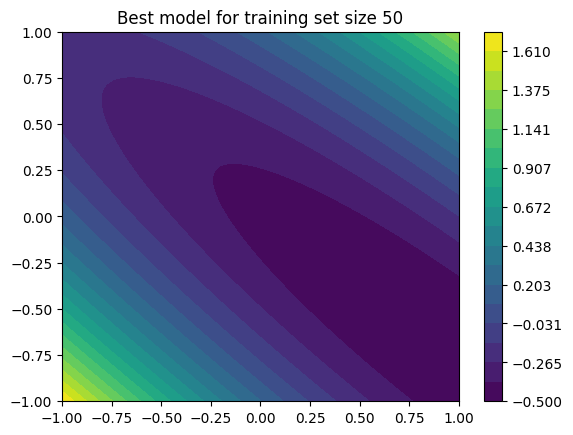

Training set size: 100
Best model: degree = 4, lambda = 1e-09
MSE = 0.1427757518683782


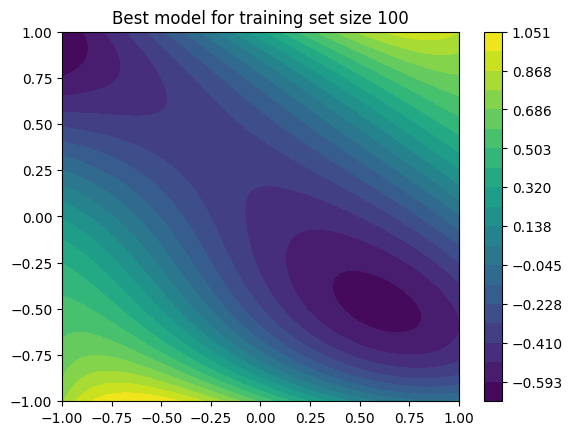

Training set size: 200
Best model: degree = 16, lambda = 1e-09
MSE = 0.037149944835744575


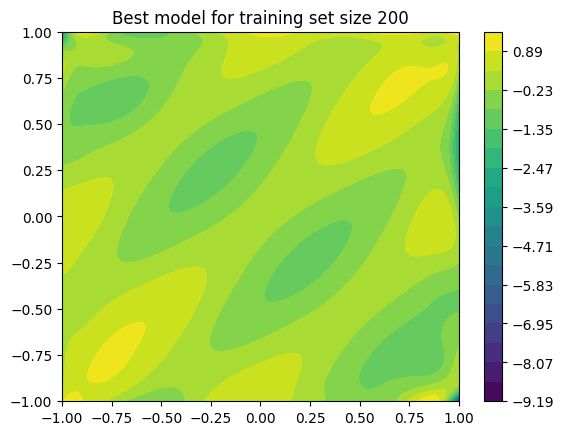

Training set size: 1000
Best model: degree = 16, lambda = 1e-09
MSE = 0.001197738721490477


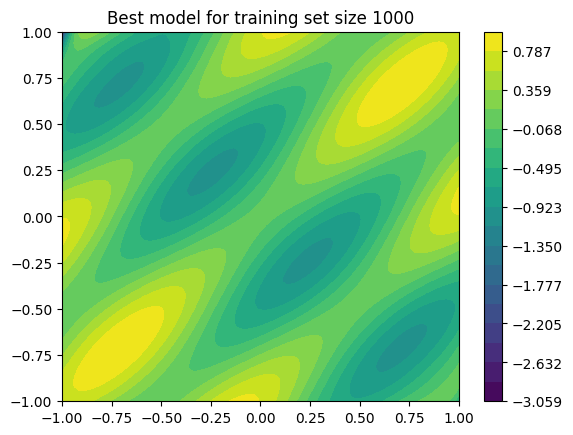

In [ ]:
# Cell type : CodeWrite 

def create_polynomial_features(X, degree):
    """ Create polynomial features of degree d from X.

    Arguments:
    X : numpy array of shape (n,d)
    degree : integer

    Returns:
    X_poly : numpy array of shape (n, d*(d+1)/2)
    """
    X_poly = np.array([np.array([x[0] ** i * x[1] ** j for i in range(degree + 1) for j in range(degree + 1) if i + j <= degree]) for x in X])
    return X_poly

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    X_poly = create_polynomial_features(X_test, degree)
    Y_test_pred = np.dot(X_poly, wt_vector)
    return Y_test_pred

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    x1, x2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    x_test = np.array([x1, x2]).reshape(2, -1).T

    y_pred = polynomial_regression_ridge_pred(x_test, wt_vector, degree).reshape(100, 100)

    plt.figure()
    plt.contourf(x1, x2, y_pred, levels=np.linspace(np.min(y_pred), np.max(y_pred), 20))
    plt.colorbar()
    plt.title(title)
    plt.show()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    # Create the feature matrix
    X_train_poly = create_polynomial_features(X_train, degree)
    
    # Compute the weight vector
    w = np.dot(np.dot(np.linalg.inv(np.dot(X_train_poly.T, X_train_poly) + reg_param * np.eye(X_train_poly.shape[1])), X_train_poly.T), Y_train)
    
    return w
    

data = np.load('./dataset/dataset4_1.npz')
X_train = data['arr_0']
Y_train = data['arr_1']
X_test = data['arr_2']
Y_test = data['arr_3']

mse_train = []
mse_test = []

for training_set in [50, 100, 200, 1000]:
    x_train = X_train[:training_set]
    y_train = Y_train[:training_set]
    
    best_model = [1e10, 1, 0, None]

    mse_train.append([])
    mse_test.append([])
    for degree in [1, 2, 4, 8, 16]:
        mse_train[-1].append([])
        mse_test[-1].append([])
        for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
            w = polynomial_regression_ridge_train(x_train, y_train, degree, reg_param)
            y_pred = polynomial_regression_ridge_pred(X_test, w, degree)

            error = np.mean((y_pred - Y_test) ** 2)
            if error < best_model[0]:
                best_model = [error, degree, reg_param, w]

            mse_test[-1][-1].append(error)
            
            y_train_pred = polynomial_regression_ridge_pred(x_train, w, degree)
            mse_train[-1][-1].append(np.mean((y_train_pred - y_train) ** 2))
    
    print('================================')
    print('Training set size: ' + str(training_set))
    print('Best model: degree = ' + str(best_model[1]) + ', lambda = ' + str(best_model[2]))
    print('MSE = ' + str(best_model[0]))

    visualise_polynomial_2d(best_model[3], best_model[1], 'Best model for training set size ' + str(training_set))
            


** Cell type : TextWrite **

## Training size 50

### MSE Table of Train Data

| Degree \ Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|:------------------:|:----:|:----:|:----:|:----:|:----:|:---:|
|         1          | 0.25038312406572716 | 0.2503831240657272 | 0.25038312406574026 | 0.2503831241962755 | 0.2503844155180829 | 0.25589782969635694 |
|         2          | 0.13411159812134157 | 0.13411159812134169 | 0.13411159812242818 | 0.13411160897987467 | 0.13421305918294477 | 0.1974826992879742 |
|         4          | 0.10201831452660748 | 0.10201831452661927 | 0.10201831464463725 | 0.10201945605437711 | 0.10410664921246368 | 0.18063792530763295 |
|         8          | 0.00013273273941584367 | 0.00019915711754000463 | 0.010765781159131762 | 0.04172134455604067 | 0.08199099254870253 | 0.1631997018256799 |
|         16         | 1.953711696234404e-08 | 9.366987287051154e-06 | 0.001317693153125932 | 0.031113092536500946 | 0.07002070549491707 | 0.1500128602707264 |

### MSE Table of Test Data

| Degree \ Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|:------------------:|:----:|:----:|:----:|:----:|:----:|:---:|
|         1          | 0.3012667744217031 | 0.3012667744217031 | 0.3012667744217031 | 0.30126249638185765 | 0.300838224249188 | 0.2783506938903703 |
|         2          | 0.15789998862477164 | 0.15789998726922783 | 0.15789985171700216 | 0.15788631804663877 | 0.15673525917060369 | 0.20822364120741071 |
|         4          | 0.15733396608389016 | 0.15733395601599093 | 0.15733295030576877 | 0.1572427810217177 | 0.16182638818918765 | 0.19656859546515698 |
|         8          | 237.6900574081501 | 172.50186208676007 | 18.594253930646314 | 0.9902507528678831 | 0.1651557616986397 | 0.19391858752900334 |
|         16         | 249.6287100763026 | 232.02555758705054 | 66.69768464201343 | 2.337308326102182 | 0.20396145737466037 | 0.19605732165075784 |

## Training size 100

### MSE Table of Train Data

| Degree \ Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|:------------------:|:----:|:----:|:----:|:----:|:----:|:---:|
|         1          | 0.25809101333931356 | 0.2580910133393136 | 0.2580910133393146 | 0.25809101334983686 | 0.2580911180012409 | 0.25873987508331553 |
|         2          | 0.13095062750764616 | 0.1309506275076462 | 0.13095062750780456 | 0.13095062909102842 | 0.13096608770879403 | 0.16496776073260552 |
|         4          | 0.11302663784179162 | 0.11302663784179275 | 0.11302663785305084 | 0.1130267496367263 | 0.11365141158303721 | 0.15237348873650713 |
|         8          | 0.041587926415535055 | 0.04158793751658103 | 0.041680039426616584 | 0.05800846639779491 | 0.09290160568698423 | 0.1448856959236295 |
|         16         | 7.735209075907542e-06 | 0.0004839667853158559 | 0.007544023922012867 | 0.041729184710357276 | 0.08369694254931284 | 0.13954383780205443 |

### MSE Table of Test Data

| Degree \ Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|:------------------:|:----:|:----:|:----:|:----:|:----:|:---:|
|         1          | 0.27314797902036564 | 0.2731479790203657 | 0.2731479790203667 | 0.27314797902036564 | 0.2730830403049822 | 0.26862153976765146 |
|         2          | 0.15320993118280649 | 0.1532099308707437 | 0.15320989966467502 | 0.15320678118763398 | 0.1529157622358392 | 0.17570947703823855 |
|         4          | 0.1427757518683782 | 0.14277575501902767 | 0.14277607009019874 | 0.14280763851944256 | 0.14602043222215288 | 0.16898019238628958 |
|         8          | 0.7129163506914099 | 0.711319627523051 | 0.5807591356154599 | 0.20363826301802895 | 0.16262757721799476 | 0.17116843679370822 |
|         16         | 54.080966942885006 | 11.770420746225904 | 23.41658884629526 | 0.417848508400298 | 0.18835914466912348 | 0.17415996890856417 |

## Training size 200

### MSE Table of Train Data

| Degree \ Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
| :-------------: | :---: | :---: | :---: | :---: | :-: | :--: |
|        1        | 0.24653507447805262 | 0.24653507447805256 | 0.2465350744780527 | 0.2465350744794022 | 0.24653508793957898 | 0.24664115434052242 |
|        2        | 0.13366532560035835 | 0.13366532560035835 | 0.13366532560039207 | 0.1336653259375662 | 0.13366866006096548 | 0.14754903759873955 |
|        4        | 0.11333815608726723 | 0.11333815608726752 | 0.11333815609035067 | 0.1133381868560195 | 0.11358989298188124 | 0.14444440429596625 |
|        8        | 0.06173732230563928 | 0.061737322385291 | 0.0617381009096994 | 0.06394973229165896 | 0.09568723069707868 | 0.1411927922429171 |
|        16       | 2.88164331627124e-05 | 0.0010854316832734929 | 0.011325564331302988 | 0.04446326750327444 | 0.08349956671799333 | 0.1337625989052683 |

### MSE Table of Test Data

| Degree \ Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
| :-------------: | :---: | :---: | :---: | :---: | :-: | :--: |
|        1        | 0.2676628765832213 | 0.2676628765832213 | 0.2676628765832213 | 0.2676628765832213 | 0.26764571096108203 | 0.2662254689671442 |
|        2        | 0.1457806507687193 | 0.14578065073911128 | 0.14578064777834812 | 0.145780352076277 | 0.14575448305638755 | 0.1586822288842049 |
|        4        | 0.13117096921340632 | 0.13117096853375207 | 0.13117090057246047 | 0.1311641457383035 | 0.13083053450167637 | 0.15708511546569276 |
|        8        | 0.13736299466535515 | 0.1373591785282532 | 0.13698204933193012 | 0.11818259300496947 | 0.11396536050910269 | 0.15645117748199025 |
|        16       | 0.037149944835744575 | 0.08371022535436663 | 0.17080665774497597 | 0.08690369897775509 | 0.1112140343299664 | 0.15224401261127452 |

## Training size 1000

### MSE Table for Train Data

| Degree/Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|:-------------:|:-----:|:-----:|:-----:|:-----:|:---:|:----:|
|       1       | 0.240728218518123 | 0.240728218518123 | 0.240728218518123 | 0.24072821851812826 | 0.24072821857035248 | 0.24072871841517668 |
|       2       | 0.1388241025424672 | 0.1388241025424672 | 0.1388241025424683 | 0.1388241025534238 | 0.13882421187545027 | 0.13971802344395548 |
|       4       | 0.12501724217128068 | 0.12501724217128068 | 0.12501724217136287 | 0.12501724299300632 | 0.1250251158363281 | 0.13417202903703976 |
|       8       | 0.0767428535436845 | 0.07674285354504166 | 0.07674286707498426 | 0.07684621641425729 | 0.09483803187328167 | 0.12843822791852466 |
|       16      | 2.5485913783350247e-05 | 0.0004451269239358029 | 0.006533490650039769 | 0.038415339887976185 | 0.08499257629516101 | 0.12168732408409079 |

### MSE Table for Test Data

| Degree/Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|:-------------:|:-----:|:-----:|:-----:|:-----:|:---:|:----:|
|       1       | 0.2625346503014934 | 0.2625346503014934 | 0.2625346503014934 | 0.26253464977907653 | 0.26253459763327336 | 0.26253030415658635 |
|       2       | 0.14242931863755284 | 0.14242931865008004 | 0.14242931990280278 | 0.14242944518520467 | 0.14244207449857785 | 0.14451885114122898 |
|       4       | 0.1270796283655174 | 0.12707962852222515 | 0.12707964419304252 | 0.1270812117133754 | 0.12724209494603952 | 0.14093658935220113 |
|       8       | 0.08481273587157581 | 0.08481261182158763 | 0.08480025143229294 | 0.0839132354599197 | 0.09782269201133861 | 0.13498892442359717 |
|       16      | 0.001197738721490477 | 0.0014900652019079633 | 0.010957186949065226 | 0.049658125957337935 | 0.0907374048049033 | 0.1278208960496532 |

## Observations

1. Train MSE is always less than test MSE for all values of $\lambda$ and degree as the model is trained for the train data and tested for the test data.
2. For small training size, for higher degree the model is overfitted as the train MSE is very low and test MSE is high.
3. For large training size, for higher degree the model is best fitted as the train MSE is very low and test MSE is also low.
4. As training size increases, train MSE decreases and test MSE decreases as the model is overfitting for the train data in the case of small training size. Once the training size is increased, the model becomes more generalised and hence the MSE decreases.
5. The actual data seems to be derived from a higher degree polynomial function as the MSE is minimum for degree 16. Or, a trigonometric function as the plot seems to be a periodic curve.

** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










<Figure size 640x480 with 0 Axes>

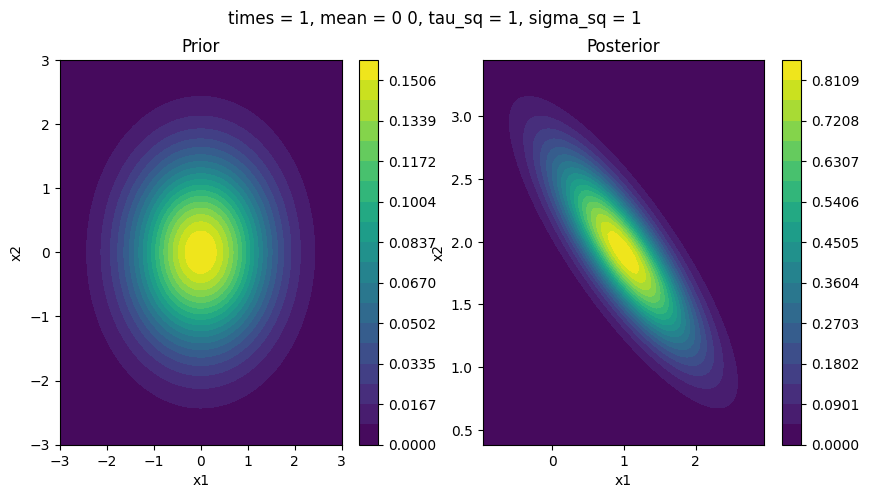

<Figure size 640x480 with 0 Axes>

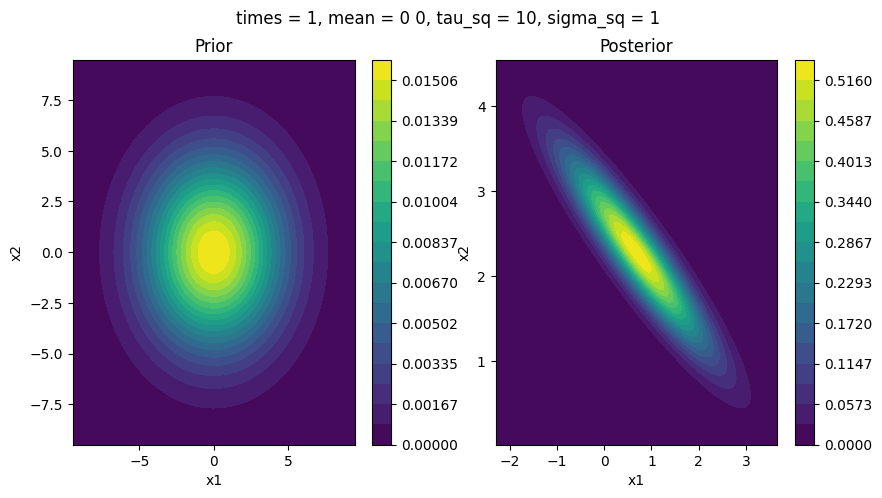

<Figure size 640x480 with 0 Axes>

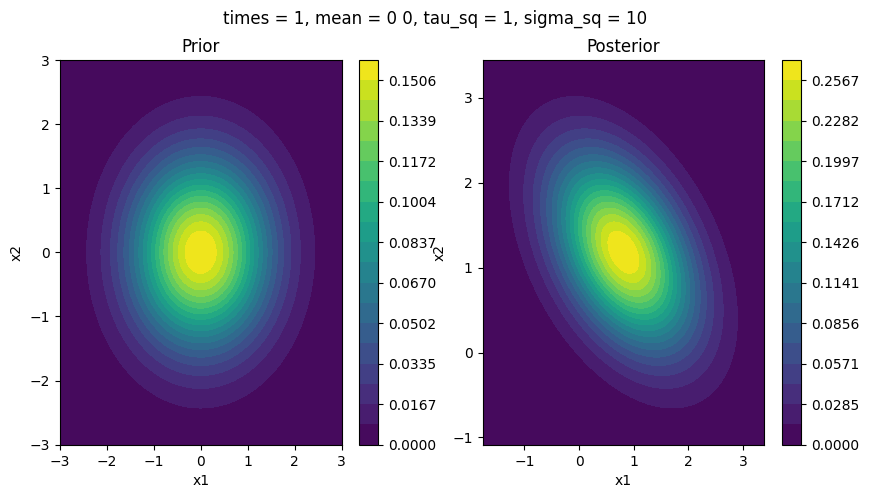

<Figure size 640x480 with 0 Axes>

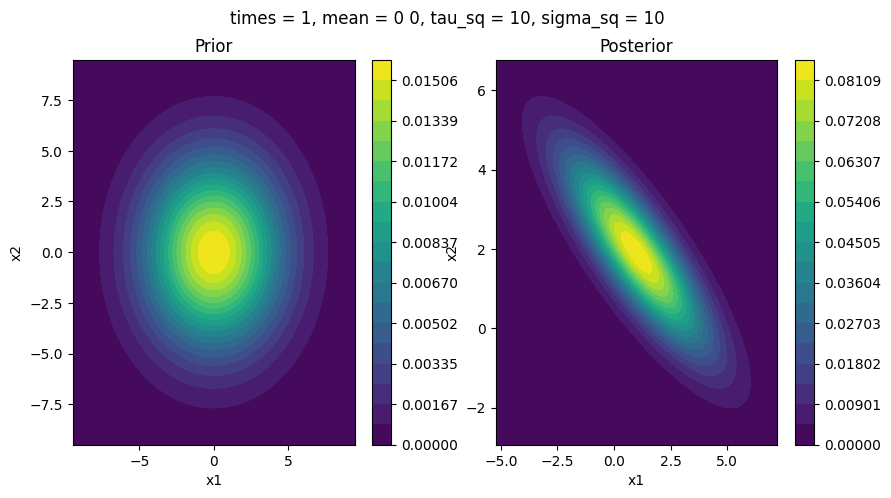

<Figure size 640x480 with 0 Axes>

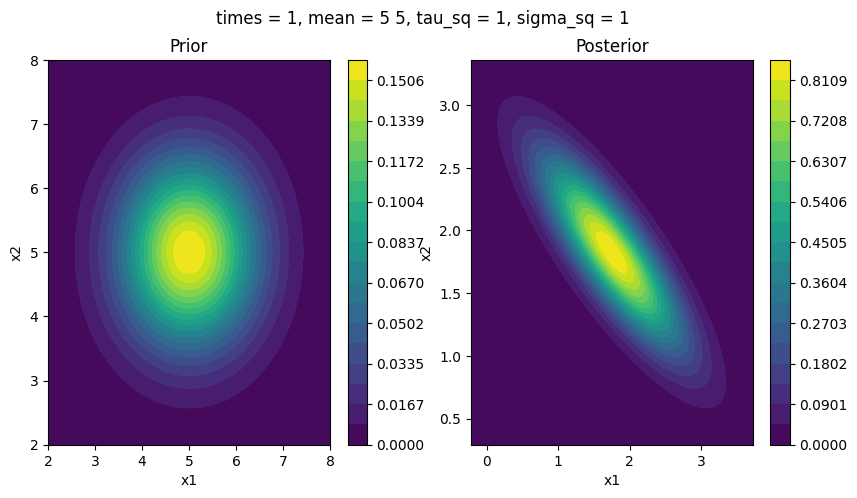

<Figure size 640x480 with 0 Axes>

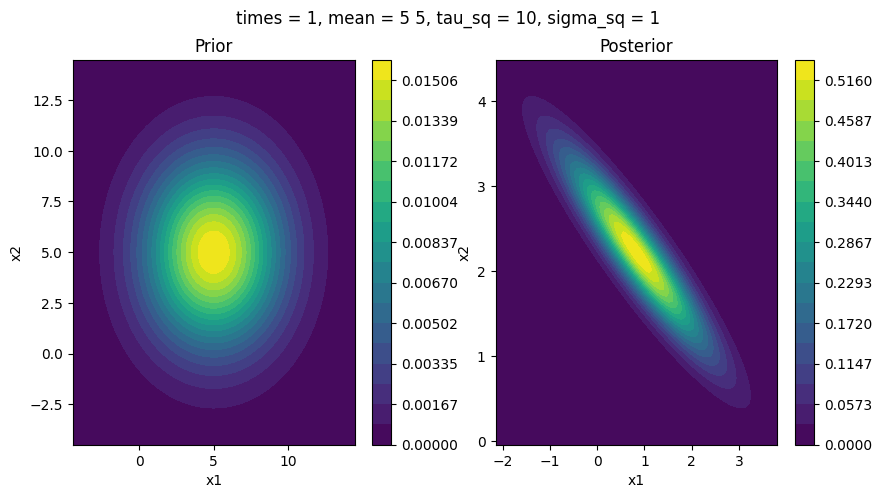

<Figure size 640x480 with 0 Axes>

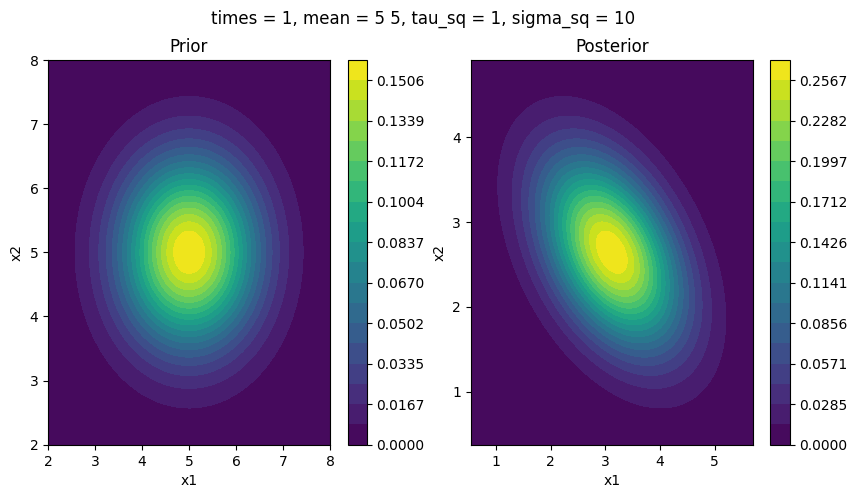

<Figure size 640x480 with 0 Axes>

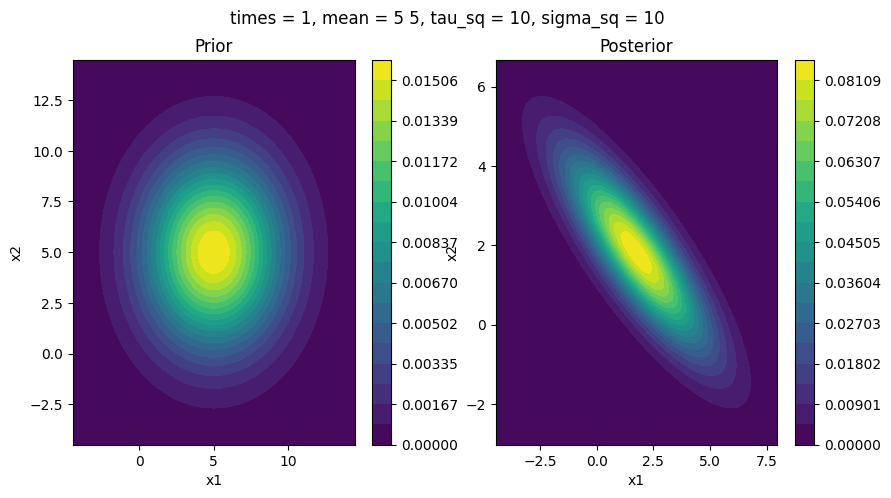

<Figure size 640x480 with 0 Axes>

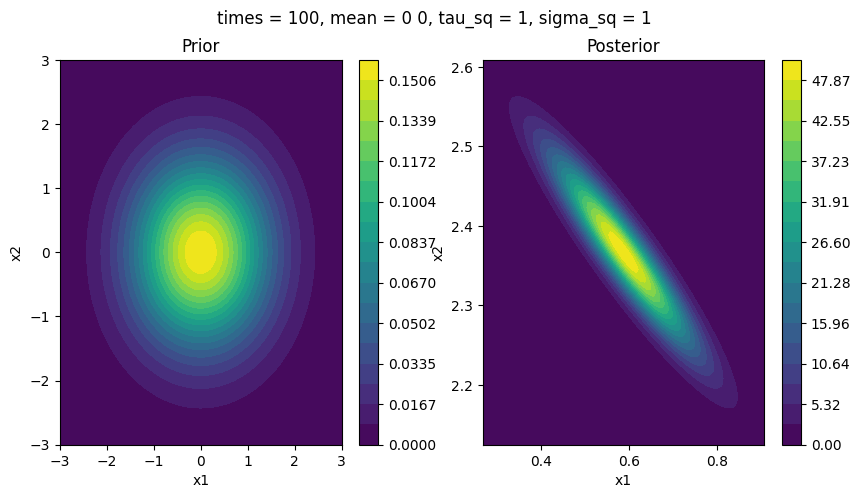

<Figure size 640x480 with 0 Axes>

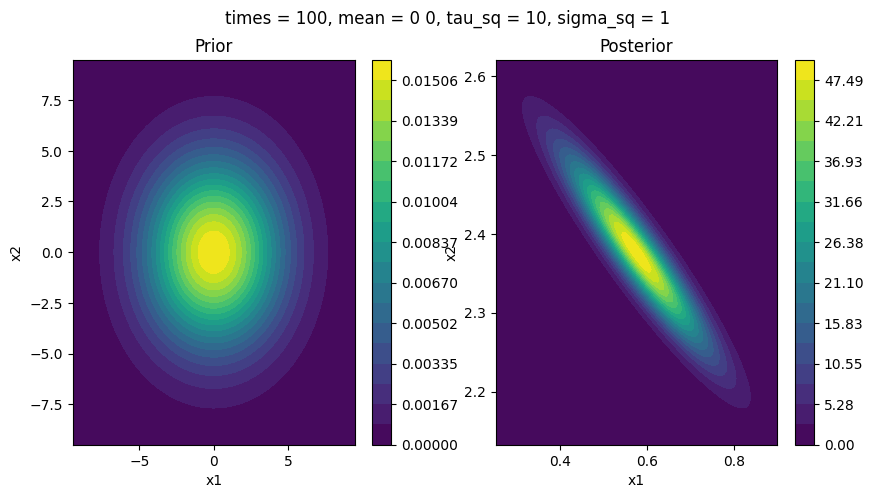

<Figure size 640x480 with 0 Axes>

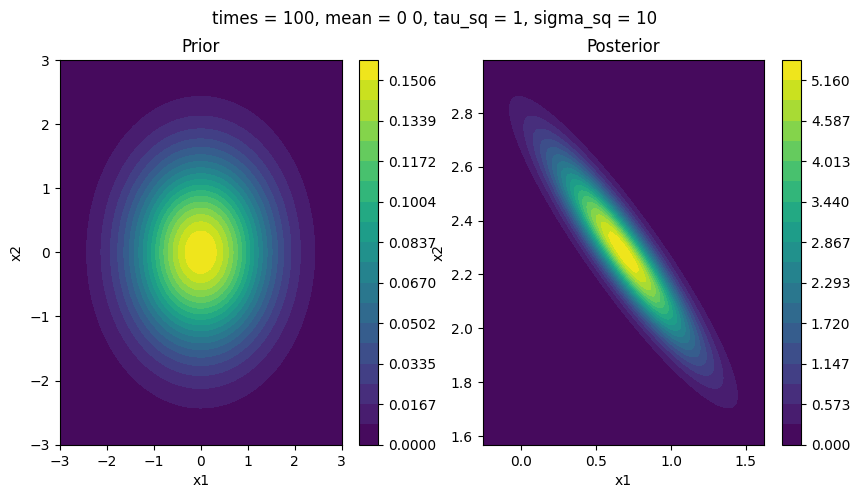

<Figure size 640x480 with 0 Axes>

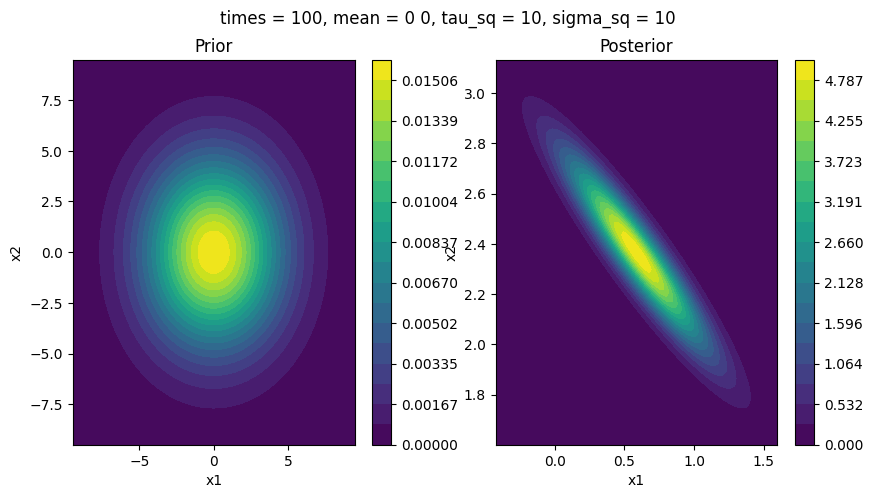

<Figure size 640x480 with 0 Axes>

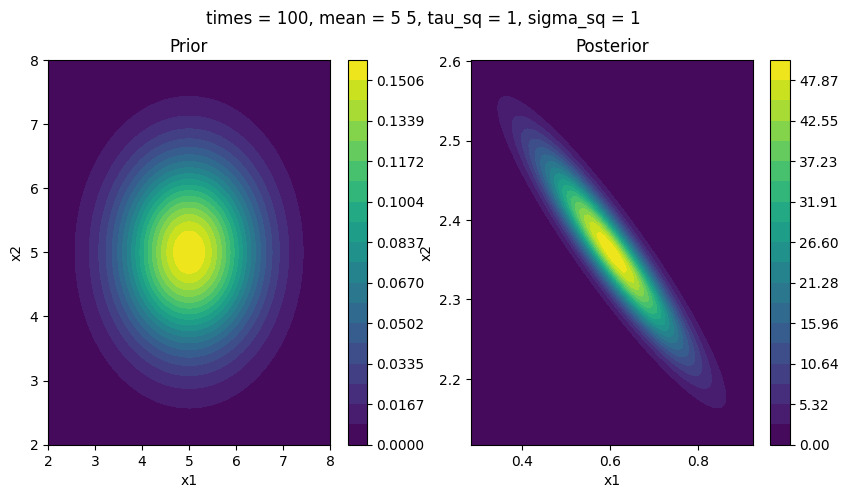

<Figure size 640x480 with 0 Axes>

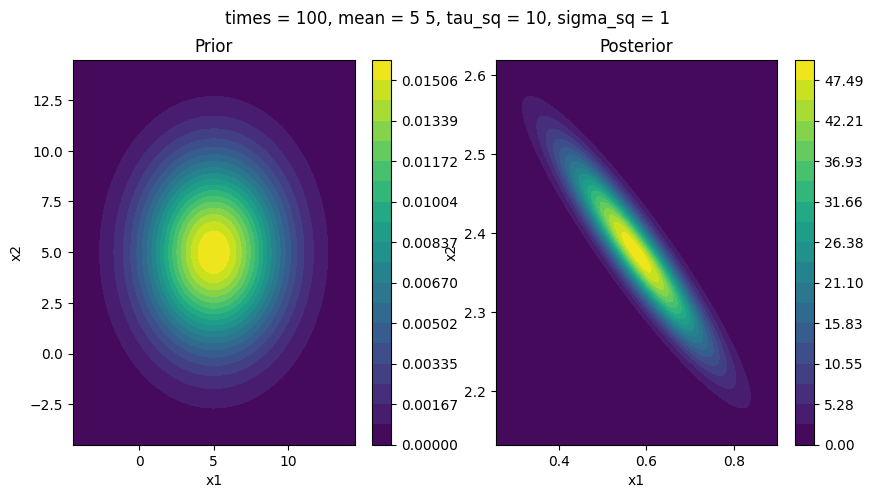

<Figure size 640x480 with 0 Axes>

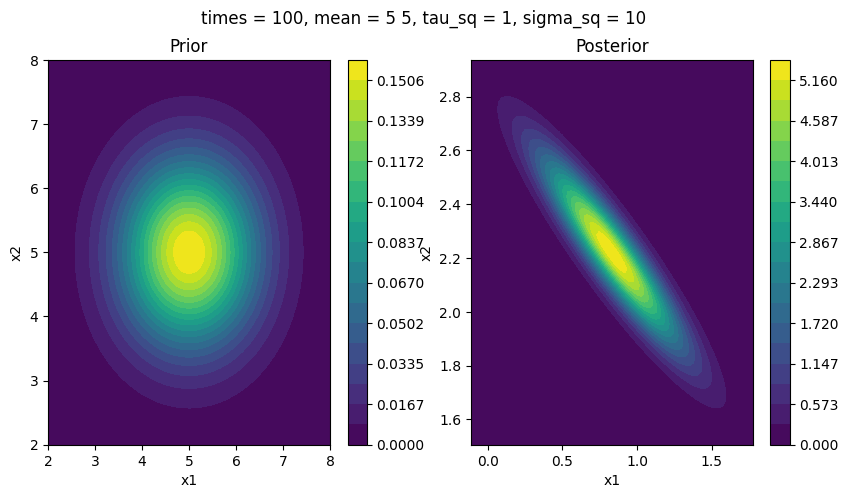

<Figure size 640x480 with 0 Axes>

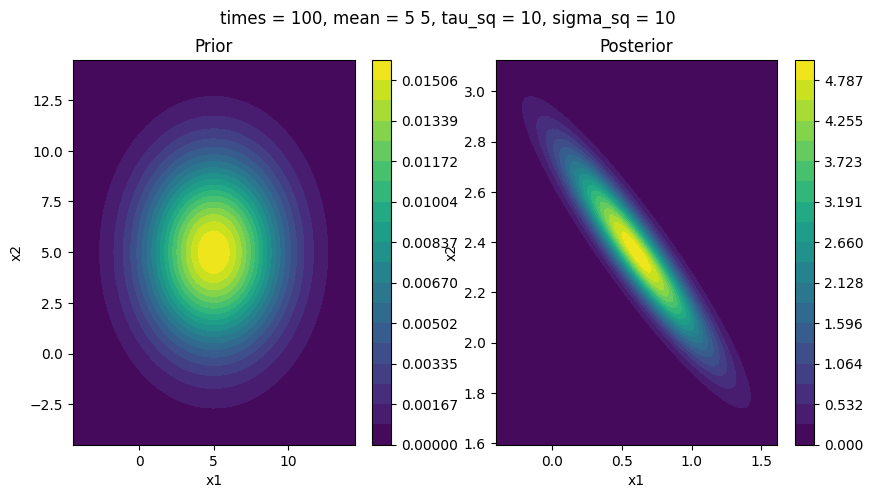

In [ ]:
# Cell type : CodeWrite 

def multivariate_gaussian(X, mu, sigma):
    """ Compute the multivariate Gaussian distribution for the given data X.

    Arguments:
    X : numpy array of shape (n,d)
    mu : numpy array of shape (d,)
    sigma : numpy array of shape (d,d)

    Returns:
    p : numpy array of shape (n,)
    
    """
    n, d = X.shape
    p = np.array([1 / ((2 * np.pi) ** (d / 2) * np.linalg.det(sigma) ** 0.5) * np.exp(-0.5 * np.dot(x - mu, np.matmul(np.linalg.inv(sigma), x - mu))) for x in X])
    return p

X_train_points = np.array([[1.0, 2.0], [2.0, 2.1], [0.6, 1.5], [1.1, 0.9]])
Y_train_points = np.array([5.1, 6.1, 4.2, 2.9])

mu_test = np.array([[0, 0], [0, 0], [0, 0], [0, 0], [5, 5], [5, 5], [5, 5], [5, 5]])
tau_test = np.array([1, 10, 1, 10, 1, 10, 1, 10])
sigma_test = np.array([1, 1, 10, 10, 1, 1, 10, 10])

size = 100
for times in [1, 100]:
    # Getting the training data
    X_train = np.repeat(X_train_points, times, axis=0)
    Y_train = np.repeat(Y_train_points, times, axis=0)

    for i in range(8):
        # Getting the mean and covariance for the prior
        mu = mu_test[i]
        tau_sq = tau_test[i]
        sigma_sq = sigma_test[i]
        cov = tau_sq * np.eye(2)

        # Create a grid of points
        x_left_lim = mu[0] - 3 * np.sqrt(cov[0, 0])
        x_right_lim = mu[0] + 3 * np.sqrt(cov[0, 0])
        y_left_lim = mu[1] - 3 * np.sqrt(cov[1, 1])
        y_right_lim = mu[1] + 3 * np.sqrt(cov[1, 1])
        x1, x2 = np.meshgrid(np.linspace(x_left_lim, x_right_lim, size), np.linspace(y_left_lim, y_right_lim, size))
        x_test = np.array([x1, x2]).reshape(2, -1).T

        # Plotting the prior
        plt.figure()
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle('times = ' + str(times) + ', mean = ' + str(mu[0]) + ' ' + str(mu[1]) + ', tau_sq = ' + str(tau_sq) + ', sigma_sq = ' + str(sigma_sq))
        ax[0].set_title('Prior')
        Z = multivariate_gaussian(x_test, mu, cov).reshape(x1.shape)
        cf = ax[0].contourf(x1, x2, Z, levels = np.linspace(0, np.max(Z), 20))
        ax[0].set_xlabel('x1')
        ax[0].set_ylabel('x2')
        plt.colorbar(cf, ax=ax[0])

        # Compute the posterior mean and covariance
        cov_post_inv = np.eye(2) / tau_sq + np.dot(X_train.T, X_train) / sigma_sq
        cov_post = np.linalg.inv(cov_post_inv)
        
        mu_post = np.dot(cov_post, np.dot(X_train.T, Y_train) / sigma_sq + mu / tau_sq)

        # Create a grid of points
        x_left_lim = mu_post[0] - 3 * np.sqrt(cov_post[0, 0])
        x_right_lim = mu_post[0] + 3 * np.sqrt(cov_post[0, 0])
        y_left_lim = mu_post[1] - 3 * np.sqrt(cov_post[1, 1])
        y_right_lim = mu_post[1] + 3 * np.sqrt(cov_post[1, 1])
        x1, x2 = np.meshgrid(np.linspace(x_left_lim, x_right_lim, size), np.linspace(y_left_lim, y_right_lim, size))
        x_test = np.array([x1, x2]).reshape(2, -1).T

        # Plotting the posterior
        ax[1].set_title('Posterior')
        Z = multivariate_gaussian(x_test, mu_post, cov_post).reshape(x1.shape)
        cf = ax[1].contourf(x1, x2, Z, levels = np.linspace(0, np.max(Z), 20))
        ax[1].set_xlabel('x1')
        ax[1].set_ylabel('x2')
        plt.colorbar(cf, ax=ax[1])
        plt.show()

** Cell type : TextWrite **

W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$.

## Prior Distribution

$\mu = [\mu_1, \mu_2]^T $

$W \sim N(\mu, \tau^2 I)$

## Posterior Distribution

$\Sigma^{-1}_{post} = \frac{I}{\tau^2} + \frac{X^TX}{\sigma^2}$

$\mu_{post} = \Sigma_{post}(\frac{\mu}{\tau^2} + \frac{X^TY}{\sigma^2})$

$W | X, Y \sim \mathcal{N}(\mu_{post}, \Sigma_{post})$

## Observations

1. Given the prior distribution, the posterior distribution is a Gaussian with mean $\mu_{post}$ and covariance $\Sigma_{post}$.

2. The mean of the posterior distribution is a weighted average of the prior mean and the mean of the data. The weight of the prior mean is $\frac{1}{\tau^2}$ and the weight of the data mean is $\frac{1}{\sigma^2}$.

3. The covariance of the posterior distribution is the inverse of the sum of the inverse of the prior covariance and the inverse of the covariance of the data. The inverse of the prior covariance is $\frac{1}{\tau^2}I$ and the inverse of the covariance of the data is $\frac{1}{\sigma^2}X^TX$.